In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency
from statsmodels.stats.power import ttest_power
import statsmodels.stats.power as smp
import statsmodels.stats.api as sm

from scipy.stats import shapiro
from scipy.stats import levene

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Read the Data

In [3]:
df = pd.read_excel('innercity.xlsx')

### Basic Data Exploration

Perform basic data exploration using Head, info and shape functions

In [4]:
df.head().T

0                1                2  \
cid                    3876100940       3145600250       7129303070   
dayhours          20150427T000000  20150317T000000  20140820T000000   
price                      600000           190000           735000   
room_bed                      4.0              2.0              4.0   
room_bath                    1.75              1.0             2.75   
living_measure             3050.0            670.0           3040.0   
lot_measure                9440.0           3101.0           2415.0   
ceil                            1                1                2   
coast                           0                0                1   
sight                         0.0              0.0              4.0   
condition                       3                4                3   
quality                       8.0              6.0              8.0   
ceil_measure               1800.0            670.0           3040.0   
basement                   1250.0              0.0              0.0   
yr_built                     1966             1948             1966   
yr_renovated                    0                0                0   
zipcode                     98034            98118            98118   
lat                       47.7228          47.5546          47.5188   
long                     -122.183         -122.274         -122.256   
living_measure15           2020.0           1660.0           2620.0   
lot_measure15              8660.0           4100.0           2433.0   
furnished                     0.0              0.0              0.0   
total_area                  12490             3771             5455   

                                3                4  
cid                    7338220280       7950300670  
dayhours          20141010T000000  20150218T000000  
price                      257000           450000  
room_bed                      3.0              2.0  
room_bath                     2.5              1.0  
living_measure             1740.0           1120.0  
lot_measure                3721.0           4590.0  
ceil                            2                1  
coast                           0                0  
sight                         0.0              0.0  
condition                       3                3  
quality                       8.0              7.0  
ceil_measure               1740.0           1120.0  
basement                      0.0              0.0  
yr_built                     2009             1924  
yr_renovated                    0                0  
zipcode                     98002            98118  
lat                       47.3363          47.5663  
long                     -122.213         -122.285  
living_measure15           2030.0           1120.0  
lot_measure15              3794.0           5100.0  
furnished                     0.0              0.0  
total_area                   5461             5710

In [5]:
df.shape

(21613, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [7]:
df.nunique().sort_values(ascending=False)

cid                 21436
total_area          11145
lot_measure          9765
lot_measure15        8682
lat                  5034
price                3625
living_measure       1038
ceil_measure          946
living_measure15      774
long                  753
dayhours              372
basement              306
yr_built              117
yr_renovated           70
zipcode                70
room_bath              30
room_bed               13
quality                12
ceil                    7
condition               6
sight                   5
coast                   3
furnished               2
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
df.select_dtypes(include='object').head()

dayhours ceil coast condition yr_built     long total_area
0  20150427T000000    1     0         3     1966 -122.183      12490
1  20150317T000000    1     0         4     1948 -122.274       3771
2  20140820T000000    2     1         3     1966 -122.256       5455
3  20141010T000000    2     0         3     2009 -122.213       5461
4  20150218T000000    1     0         3     1924 -122.285       5710

In [10]:
### Geting unique counts of all Objects
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

dayhours
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150524T000000      1
20141102T000000      1
20150527T000000      1
20150308T000000      1
20140727T000000      1
Name: dayhours, Length: 372, dtype: int64


ceil
1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64


coast
0    21421
1      161
$       30
Name: coast, dtype: int64


condition
3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64


yr_built
2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64


long
-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.733      1
-121.849      1
-121.792      1
-121.403      1
-121.891      1
Name: long, Length: 753, dtype

In [11]:
# Boolean indexing to filter rows with '$' in the 'ceil' column
rows_with_dollar = df[df['long'].astype(str).str.contains('\$')]

# Print rows with '$' in the 'ceil' column
rows_with_dollar

cid         dayhours    price  room_bed  room_bath  \
5      8016250080  20140709T000000   245000       3.0       2.50   
1408   3782100035  20140813T000000   299000       3.0       1.00   
1961   2206700215  20150422T000000   550000       4.0       2.00   
5153   1941400080  20141020T000000   277000       3.0       2.25   
5413   1930301015  20150428T000000   818000       3.0       3.25   
6362   3830630310  20140725T000000   260000       3.0       2.50   
7983   6072400280  20140619T000000   619850       4.0       2.50   
8230    567000660  20141204T000000   425000       4.0       2.00   
8586   5135000050  20140801T000000   960000       4.0       2.50   
9930   1952000150  20140506T000000   530000       5.0       2.50   
10295  5649300120  20150420T000000   597500       4.0       3.00   
10639  9208900037  20140919T000000  6890000       6.0       7.75   
10663  5448300150  20150105T000000   550000       3.0       2.25   
11255  4219400580  20140612T000000  1690000       4.0       2.50   
11277  8813400155  20141219T000000   808000       8.0       3.75   
11295  7579200715  20141205T000000   400000       3.0       1.75   
12568  3975400085  20140624T000000   850000       4.0       3.00   
12732  3331001115  20140728T000000   299000       3.0       2.50   
13550  2823059055  20150329T000000   199000       3.0       1.00   
13744  2377000040  20141218T000000   288000       3.0       1.00   
14217  7518503830  20140723T000000   551000       4.0       1.50   
14385  8807600340  20150325T000000   322000       3.0       1.00   
14542    98000130  20150324T000000  1430000       4.0       5.00   
14642  2523039282  20141121T000000   250000       2.0       1.00   
14808  9524100207  20150130T000000   245000       2.0       1.50   
15582  2754700035  20141125T000000   925000       5.0       3.50   
16449  2123049502  20140623T000000   215000       3.0       2.00   
16758  7856700920  20140628T000000   699900       4.0       2.50   
17976  2123700100  20141202T000000   353000       5.0       2.75   
18380  8078100260  20140912T000000   340000       4.0       2.50   
18877  7312400030  20150130T000000   442000       2.0       1.00   
19136  1446800995  20140805T000000   300000       3.0       2.50   
19981  3566800125  20150330T000000   425000       2.0       1.00   
21281  2061800045  20150122T000000   435000       6.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
5              1610.0       7223.0    2     0    0.0  ...      0.0      1994   
1408            960.0       8100.0    1     0    0.0  ...      0.0      1955   
1961           2070.0       9822.0    1     0    0.0  ...      0.0      1955   
5153           1610.0      11920.0    1     0    0.0  ...    500.0      1968   
5413           2200.0       4800.0    2     0    2.0  ...    290.0      1943   
6362           1670.0       5797.0    2     0    0.0  ...      0.0      1988   
7983           2270.0       9247.0    1     0    0.0  ...    770.0      1972   
8230           1490.0       5300.0    1     0    0.0  ...    380.0      1977   
8586           2820.0       5934.0    1     0    3.0  ...   1050.0      1952   
9930           2910.0       9636.0    1     0    0.0  ...   1220.0      1964   
10295          1890.0      35280.0    1     0    0.0  ...    380.0      1979   
10639          9890.0      31374.0    2     0    4.0  ...   1030.0      2001   
10663          1950.0      26500.0    1     0    0.0  ...    380.0      1965   
11255          3000.0       7500.0    2     0    0.0  ...      0.0      1937   
11277          3460.0       4600.0    2     0    0.0  ...    600.0      1987   
11295          1860.0       5750.0  1.5     0    0.0  ...    560.0      1918   
12568          3330.0       4000.0    1     0    0.0  ...   1540.0      1958   
12732          1590.0       3121.0    2     0    0.0  ...      0.0      1994   
13550          1390.0      21262.0    1     0    0.0  ...      0.0      1958   
13744          1410.0      40500.

In [12]:

import re

# Assuming 'df' is your DataFrame
has_other_symbols = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'object':
        has_other_symbols[column] = df[column].str.contains('[^\d.$]', regex=True)

# Select rows where any column contains other symbols
rows_with_symbols = df[has_other_symbols.any(axis=1)]

# Display the rows
has_other_symbols



dayhours ceil coast condition yr_built long total_area
0          True  NaN   NaN       NaN      NaN  NaN        NaN
1          True  NaN   NaN       NaN      NaN  NaN        NaN
2          True  NaN   NaN       NaN      NaN  NaN        NaN
3          True  NaN   NaN       NaN      NaN  NaN        NaN
4          True  NaN   NaN       NaN      NaN  NaN        NaN
...         ...  ...   ...       ...      ...  ...        ...
21608      True  NaN   NaN       NaN      NaN  NaN        NaN
21609      True  NaN   NaN       NaN      NaN  NaN        NaN
21610      True  NaN   NaN       NaN      NaN  NaN        NaN
21611      True  NaN   NaN       NaN      NaN  NaN        NaN
21612      True  NaN   NaN       NaN      NaN  NaN        NaN

[21613 rows x 7 columns]

In [13]:
print(df['dayhours'].unique())
print(df['yr_built'].unique())
print(df['long'].unique())

['20150427T000000' '20150317T000000' '20140820T000000' '20141010T000000'
 '20150218T000000' '20140709T000000' '20140715T000000' '20140618T000000'
 '20140721T000000' '20141028T000000' '20140502T000000' '20150123T000000'
 '20141029T000000' '20150311T000000' '20140822T000000' '20140522T000000'
 '20140819T000000' '20150428T000000' '20150212T000000' '20140909T000000'
 '20141125T000000' '20140818T000000' '20140719T000000' '20141230T000000'
 '20150112T000000' '20140829T000000' '20150501T000000' '20140811T000000'
 '20141103T000000' '20140620T000000' '20141203T000000' '20141030T000000'
 '20141208T000000' '20140903T000000' '20140610T000000' '20150422T000000'
 '20140625T000000' '20150222T000000' '20150113T000000' '20140923T000000'
 '20140624T000000' '20150128T000000' '20141014T000000' '20150316T000000'
 '20140912T000000' '20140606T000000' '20141017T000000' '20140827T000000'
 '20150225T000000' '20140707T000000' '20150403T000000' '20140712T000000'
 '20140603T000000' '20140508T000000' '20141009T0000

In [14]:
rows_with_symbols_ceil = df[df['ceil'].str.contains('[^\d.]|\$', na=False)]
rows_with_symbols_coast = df[df['coast'].str.contains('[^\d.]|\$', na=False)]


In [15]:
# Convert 'dayhours' column to timestamp
df['dayhours'] = pd.to_datetime(df['dayhours'], format='%Y%m%dT%H%M%S')

# Check the updated DataFrame
df['dayhours']

0       2015-04-27
1       2015-03-17
2       2014-08-20
3       2014-10-10
4       2015-02-18
           ...    
21608   2015-03-10
21609   2014-05-21
21610   2014-09-05
21611   2015-02-06
21612   2014-12-29
Name: dayhours, Length: 21613, dtype: datetime64[ns]

In [16]:
df_date=df.copy()

df_date['month_year']=df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
df_date['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [17]:
df_date['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

In [18]:
df['ceil']=df['ceil'].replace('$',np.nan).astype(str).astype('float64')

In [19]:
df['coast']=df['coast'].replace('$',np.nan).astype(str).astype('float64')

In [20]:
df['yr_built']=df['yr_built'].replace('$',np.nan).astype(str).astype('float64')

In [21]:
df['long']=df['long'].replace('$',np.nan).astype(str).astype('float64')

In [22]:
df['total_area']=df['total_area'].replace('$',np.nan).astype(str).astype('float64')

In [23]:
df['condition']=df['condition'].replace('$',np.nan).astype(str).astype('float64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  float64       
 8   coast             21582 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21528 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

In [25]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [26]:
#For geographic visual
import geopandas as gpd
from shapely.geometry import Point, Polygon
#For current working directory
import os
cwd = os.getcwd()

ImportError: cannot import name '_NDFrameIndexer' from 'pandas.core.indexing' (C:\Users\91994\anaconda3\lib\site-packages\pandas\core\indexing.py)

In [25]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [26]:
df[['price', 'living_measure','lot_measure', 
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area']].describe().T

count           mean            std      min        25%  \
price             21613.0  540182.158793  367362.231718  75000.0  321950.00   
living_measure    21596.0    2079.860761     918.496121    290.0    1429.25   
lot_measure       21571.0   15104.583283   41423.619385    520.0    5040.00   
ceil_measure      21612.0    1788.366556     828.102535    290.0    1190.00   
basement          21612.0     291.522534     442.580840      0.0       0.00   
living_measure15  21447.0    1987.065557     685.519629    399.0    1490.00   
lot_measure15     21584.0   12766.543180   27286.987107    651.0    5100.00   
total_area        21545.0   17192.041634   41628.688279   1423.0    7032.00   

                       50%       75%        max  
price             450000.0  645000.0  7700000.0  
living_measure      1910.0    2550.0    13540.0  
lot_measure         7618.0   10684.5  1651359.0  
ceil_measure        1560.0    2210.0     9410.0  
basement               0.0     560.0     4820.0  
living_measure15    1840.0    2360.0     6210.0  
lot_measure15       7620.0   10087.0   871200.0  
total_area          9575.0   13000.0  1652659.0

- Price varies from $ 75,000 to $7,700,000, The median (50th percentile) price is $450,000, which indicates that half of the houses have prices below this value.
- The lot measure ranges from 520 square feet to 1,651,359 square feet, showing significant variability in the sizes of lots. living_measurement, ceil_measurement, basement measurement and total area. 
this might mean there are outliers in the data.


In [27]:
num = ['price','living_measure','lot_measure',
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area','long','yr_built']
cat = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality','furnished','yr_built']

In [28]:
for feature in cat:
    print(df[feature].value_counts())
    print('\n')

room_bed
3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64


room_bath
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: count, dtype: int64


ceil
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: count, dtype: int64


coast
0.0    21421
1.0      161
Name: count, dtype: int64


sight
0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: count, dtype: int64


condition
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: count, dtype: i

In [29]:
for i in df[num]:
    median = df[i].median()
    df[i] = df[i].fillna(median)

In [30]:
for i in df[cat]:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [31]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [32]:
num = ['price','living_measure','lot_measure',
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area']
cat = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality','furnished']

		Univariate Analysis of room_bed
-----------------------------------------------------------
1. No of unique values in room_bed are: 13. 
The distribution is as follows:
room_bed
room_bed
3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


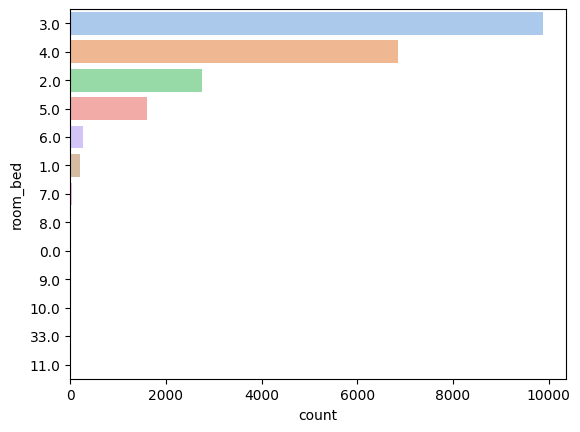

	
		Univariate Analysis of room_bath
-----------------------------------------------------------
2. No of unique values in room_bath are: 30. 
The distribution is as follows:
room_bath
room_bath
2.50    5466
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)
C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=g.get_xticklabels(), rotation=90, fontweight = 'bold')


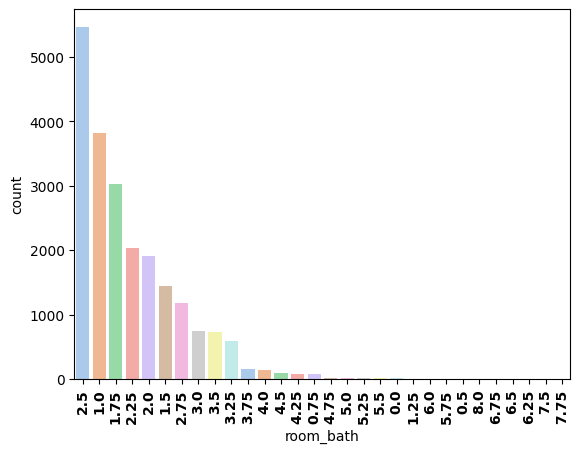

	
		Univariate Analysis of ceil
-----------------------------------------------------------
3. No of unique values in ceil are: 6. 
The distribution is as follows:
ceil
ceil
1.0    10719
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


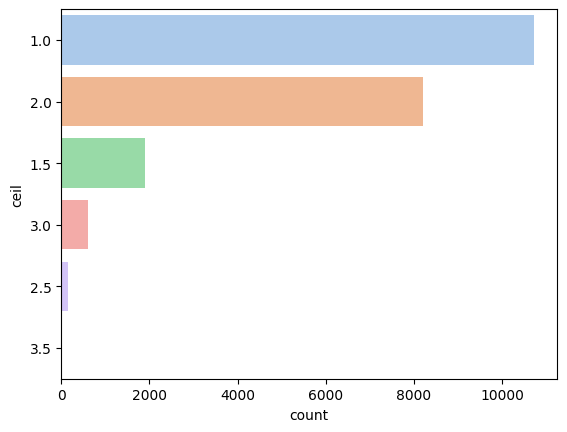

	
		Univariate Analysis of coast
-----------------------------------------------------------
4. No of unique values in coast are: 2. 
The distribution is as follows:
coast
coast
0.0    21452
1.0      161
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


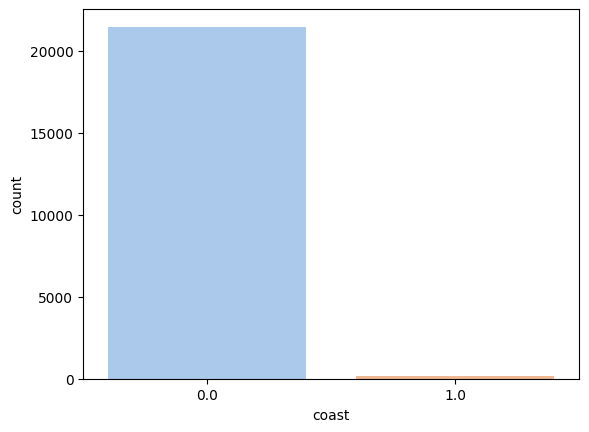

	
		Univariate Analysis of sight
-----------------------------------------------------------
5. No of unique values in sight are: 5. 
The distribution is as follows:
sight
sight
0.0    19494
2.0      959
3.0      510
1.0      332
4.0      318
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


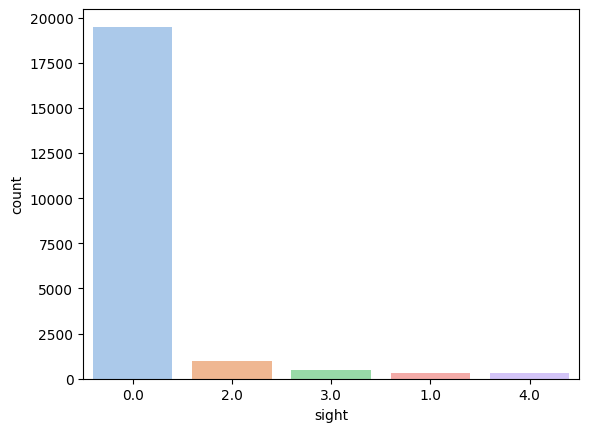

	
		Univariate Analysis of condition
-----------------------------------------------------------
6. No of unique values in condition are: 5. 
The distribution is as follows:
condition
condition
3.0    14063
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


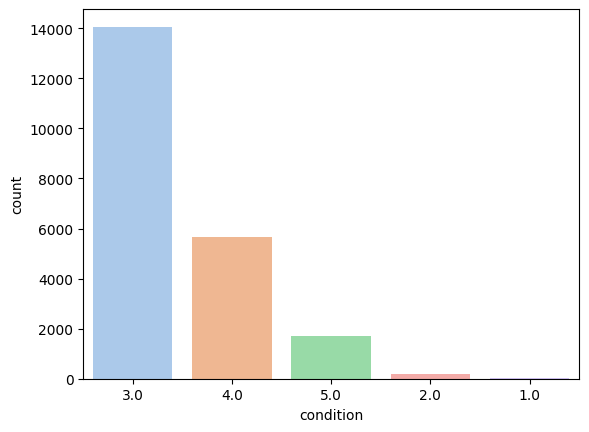

	
		Univariate Analysis of quality
-----------------------------------------------------------
7. No of unique values in quality are: 12. 
The distribution is as follows:
quality
quality
7.0     8982
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


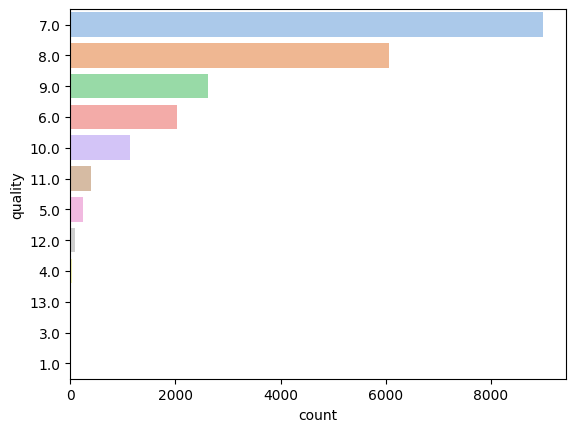

	
		Univariate Analysis of furnished
-----------------------------------------------------------
8. No of unique values in furnished are: 2. 
The distribution is as follows:
furnished
furnished
0.0    17367
1.0     4246
Name: count, dtype: int64



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4245120616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)


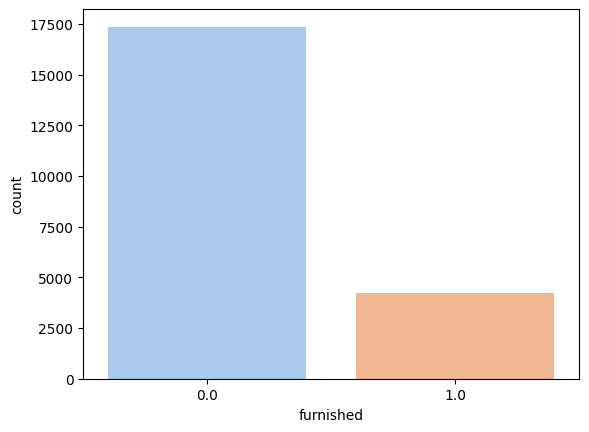

In [182]:
from colorama import Style
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis_categorical(cat, i):
    print(f"\t\t{Style.BRIGHT}Univariate Analysis of {cat}")
    print(f"-----------------------------------------------------------{Style.RESET_ALL}")
    print(f"{i+1}. No of unique values in {Style.BRIGHT}{cat}{Style.RESET_ALL} are: {df[cat].nunique()}. \nThe distribution is as follows:")
    print(f"{Style.BRIGHT}{cat}{Style.RESET_ALL}\n{df[cat].value_counts()}\n")
    vc = df[cat].value_counts()
    if len(vc.index) <= 5:
        g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)
    elif len(vc.index) > 5 and len(vc.index) <= 15:
        g = sns.countplot(y=cat, data=df, palette='pastel', order=df[cat].value_counts().index)
    elif len(vc.index) > 15:
        g = sns.countplot(x=cat, data=df, palette='pastel', order=df[cat].value_counts().index)
        g.set_xticklabels(labels=g.get_xticklabels(), rotation=90, fontweight = 'bold')

    plt.show()
    print("\t")

for i, x in enumerate(cat):
    if x != 'Model':
        univariate_analysis_categorical(x, i)


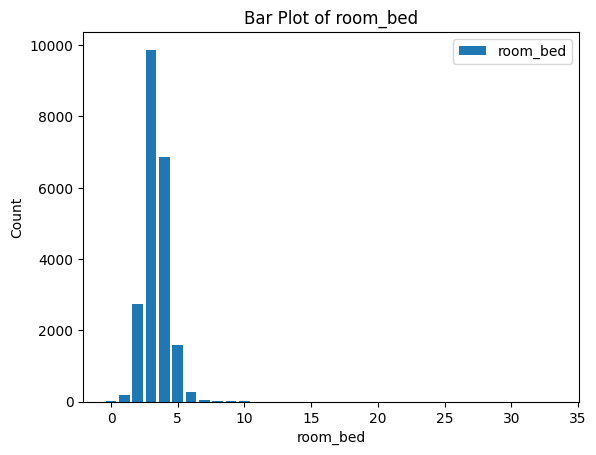

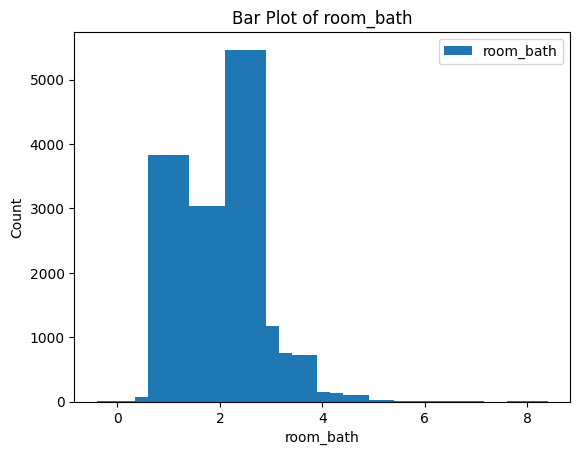

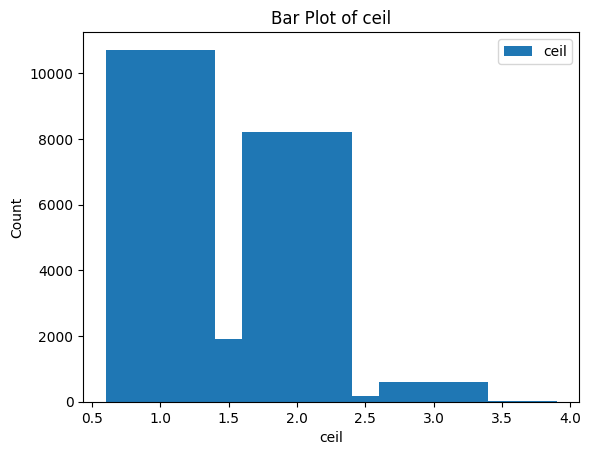

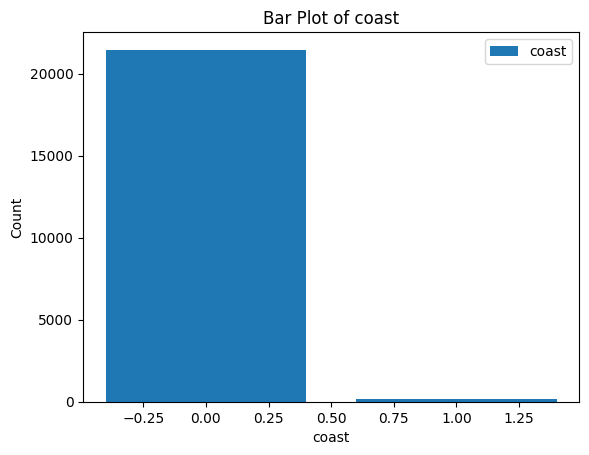

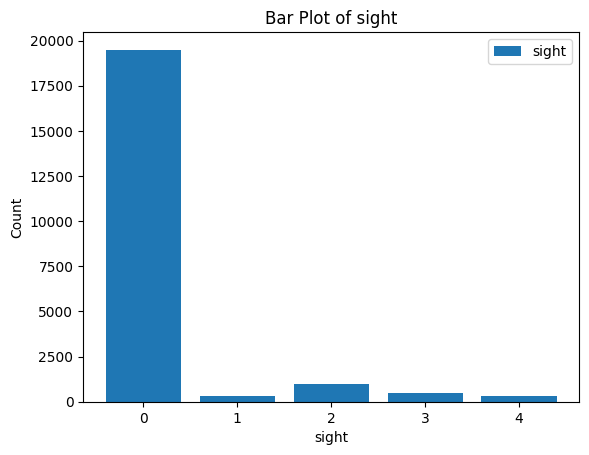

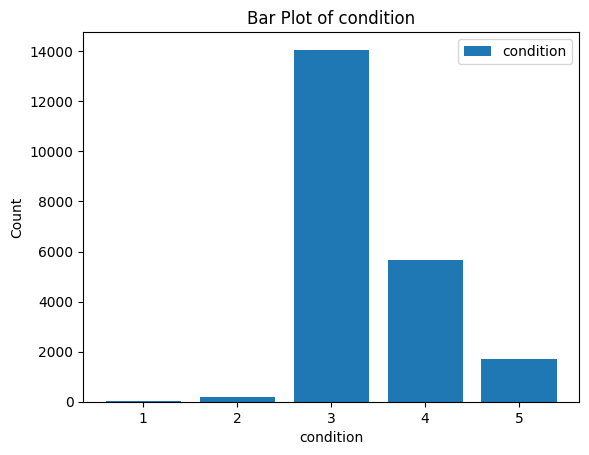

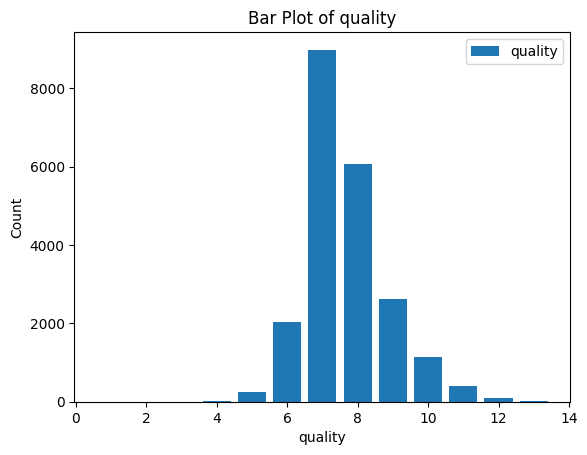

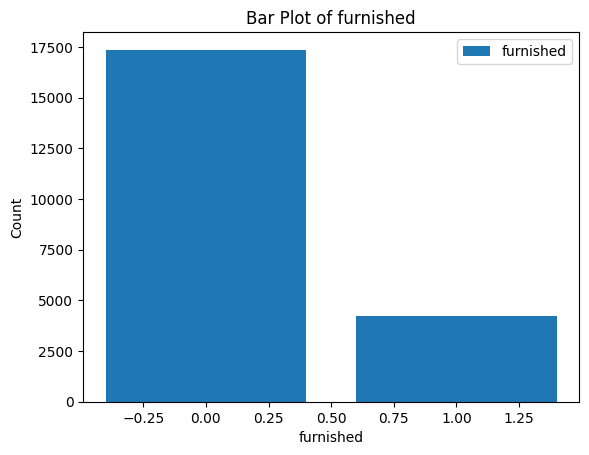

In [181]:
import matplotlib.pyplot as plt

# Create a stacked bar plot for each categorical column in 'cat'
for column in cat:
    # Get the value counts for the current categorical column
    value_counts = df[column].value_counts()
    
    # Create a stacked bar plot
    fig, ax = plt.subplots()
    ax.bar(value_counts.index, value_counts, label=column)
    
    # Set the title and labels
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Show the legend
    ax.legend()
    
    plt.show()




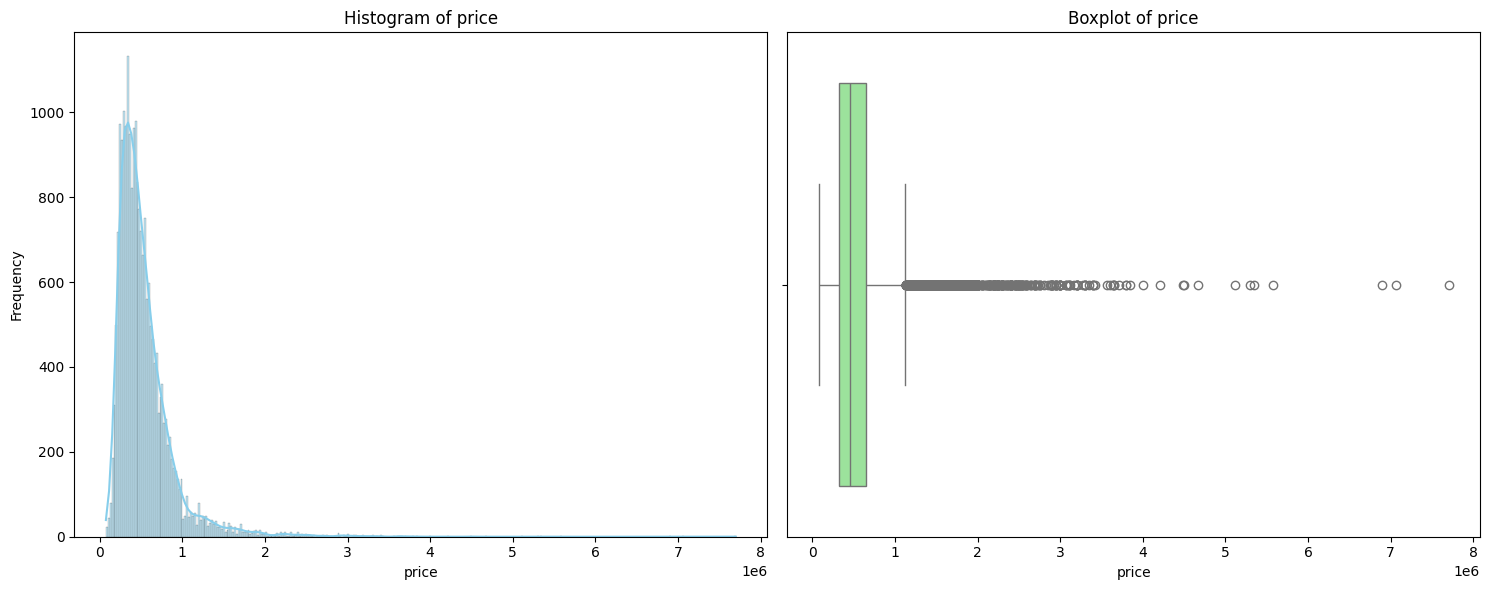

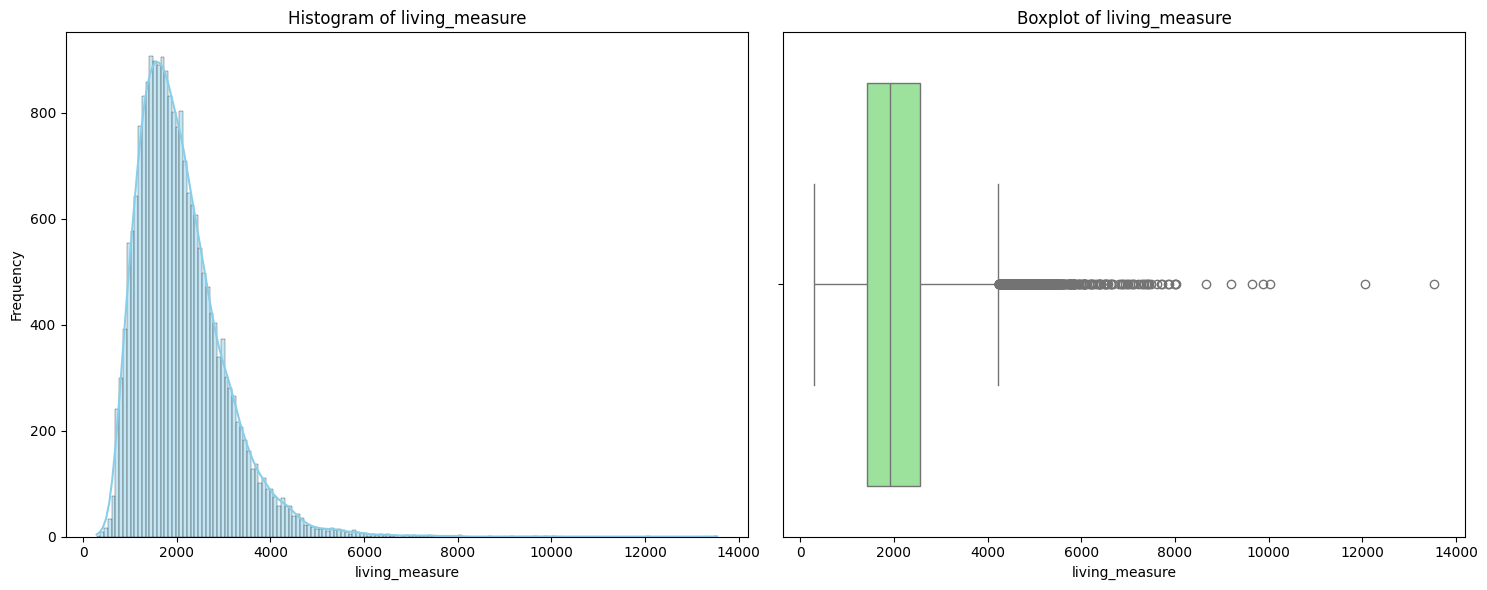

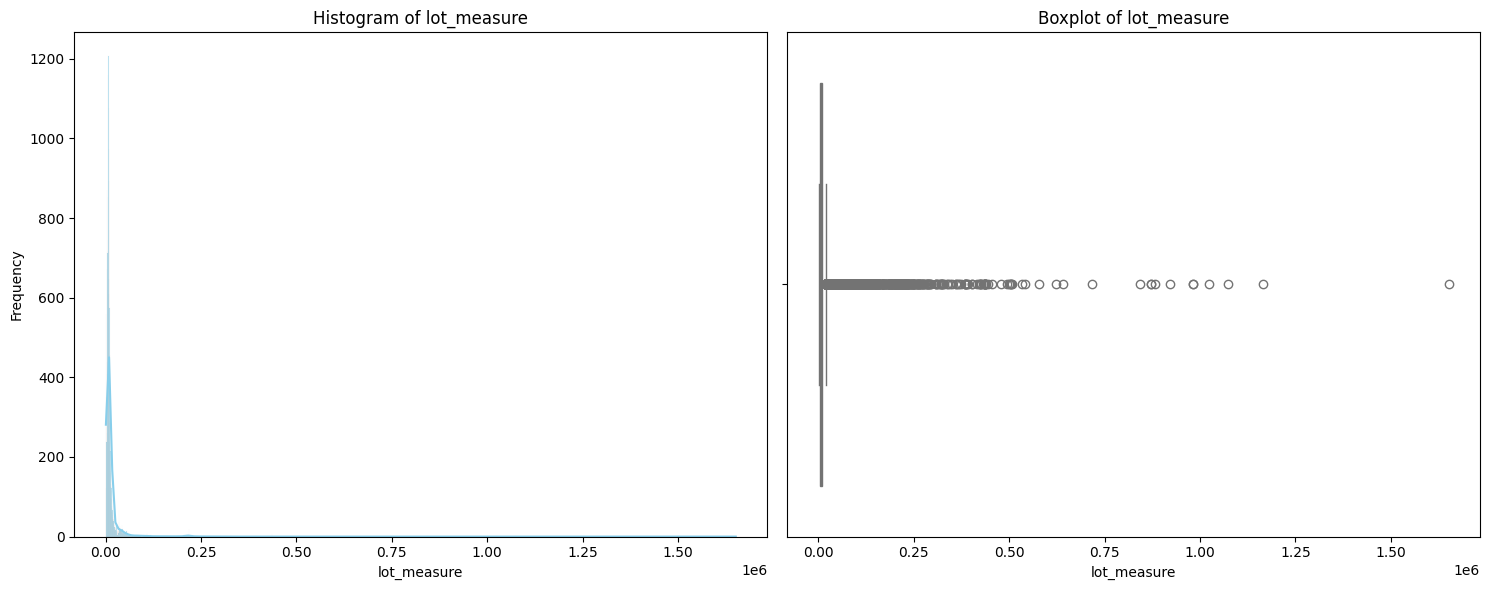

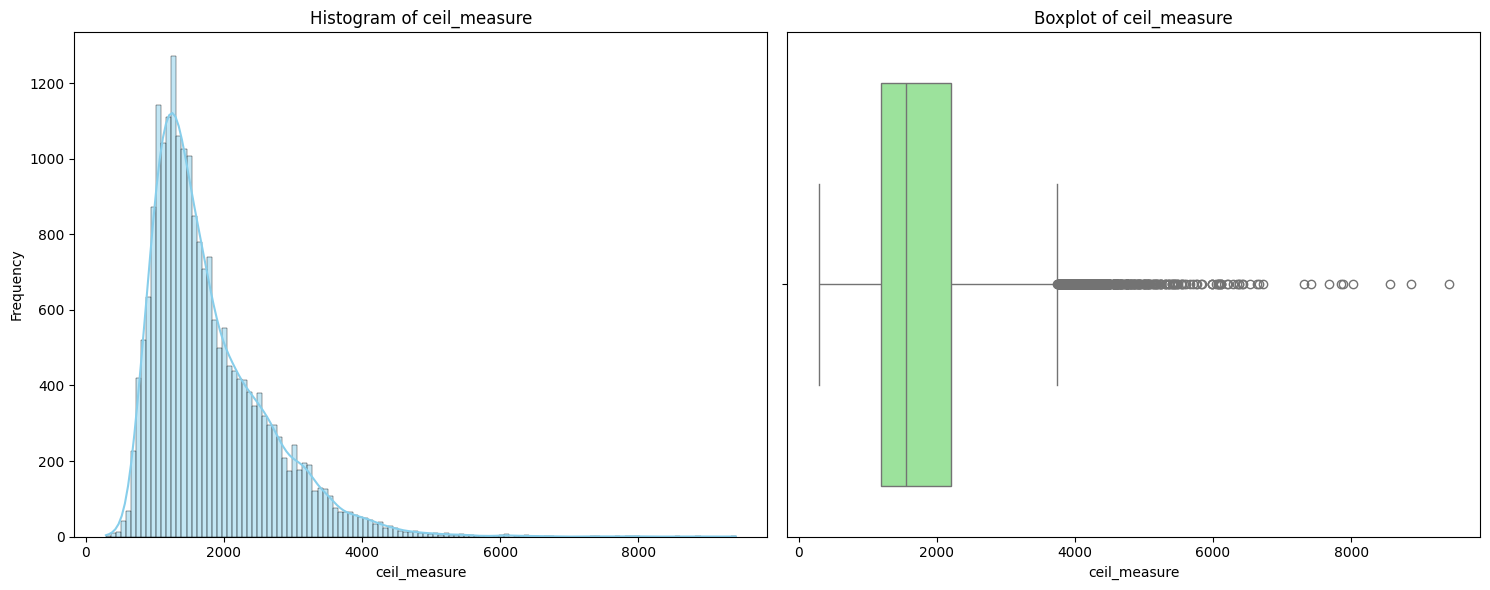

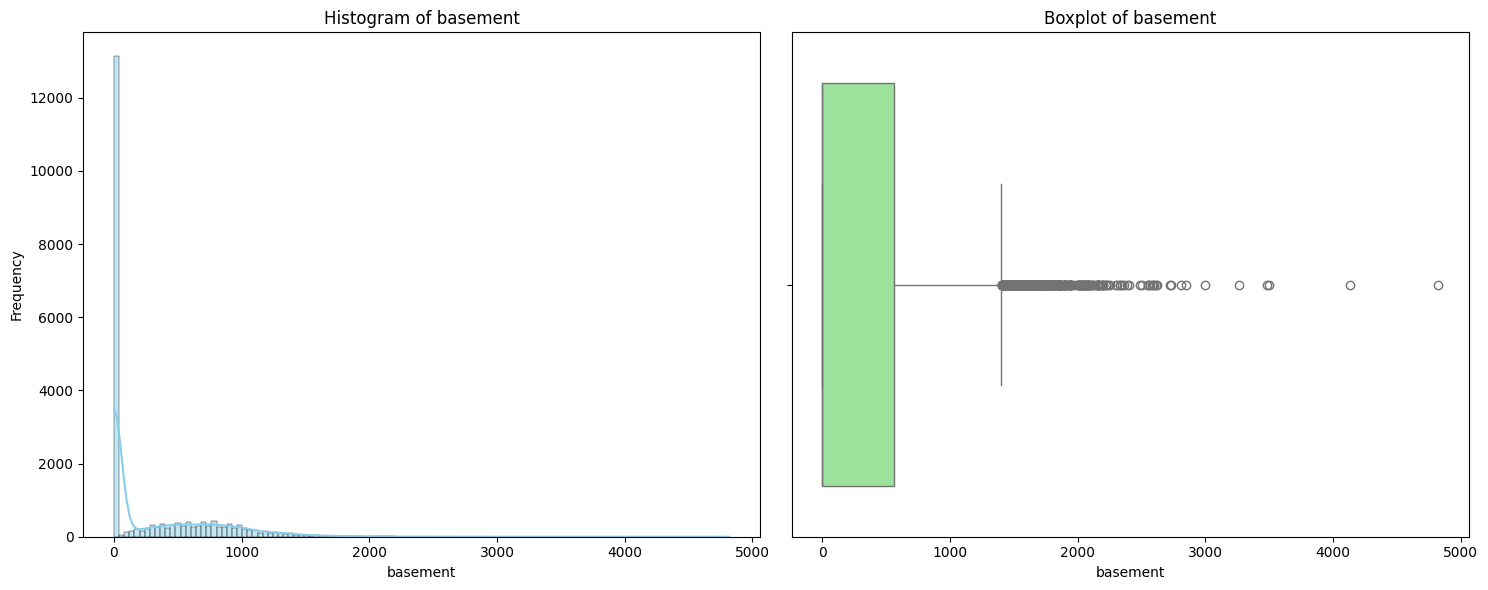

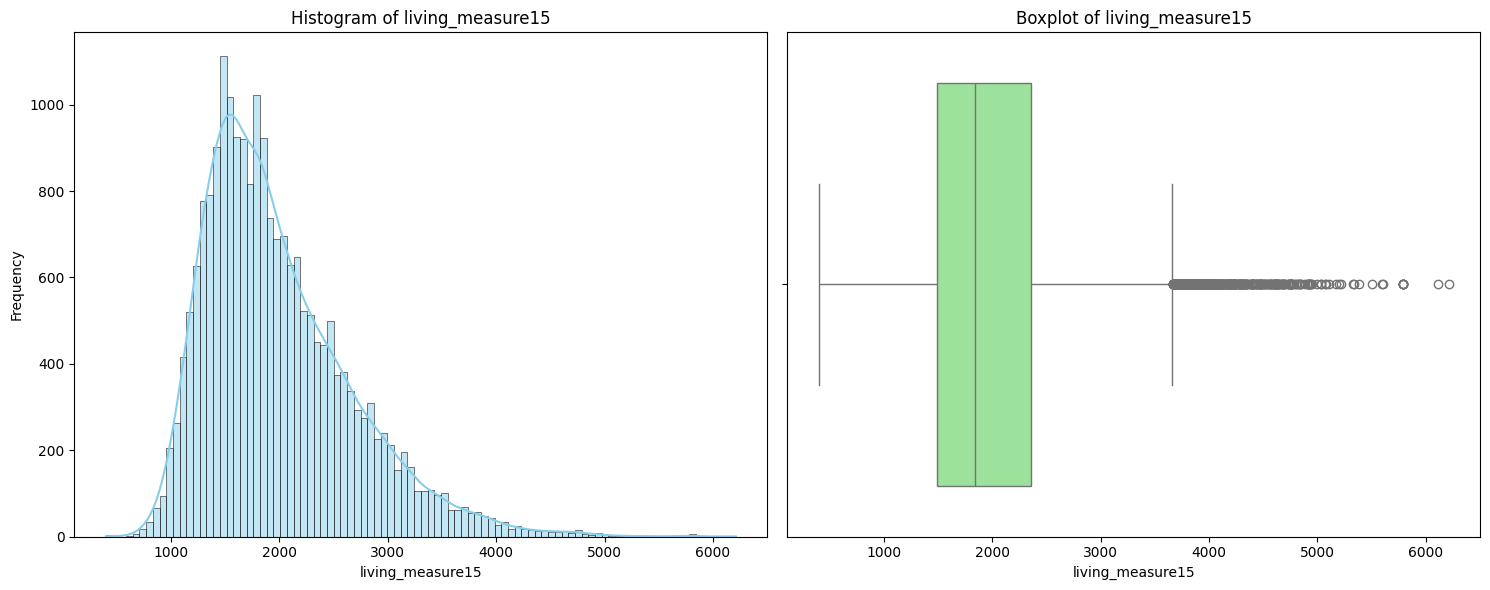

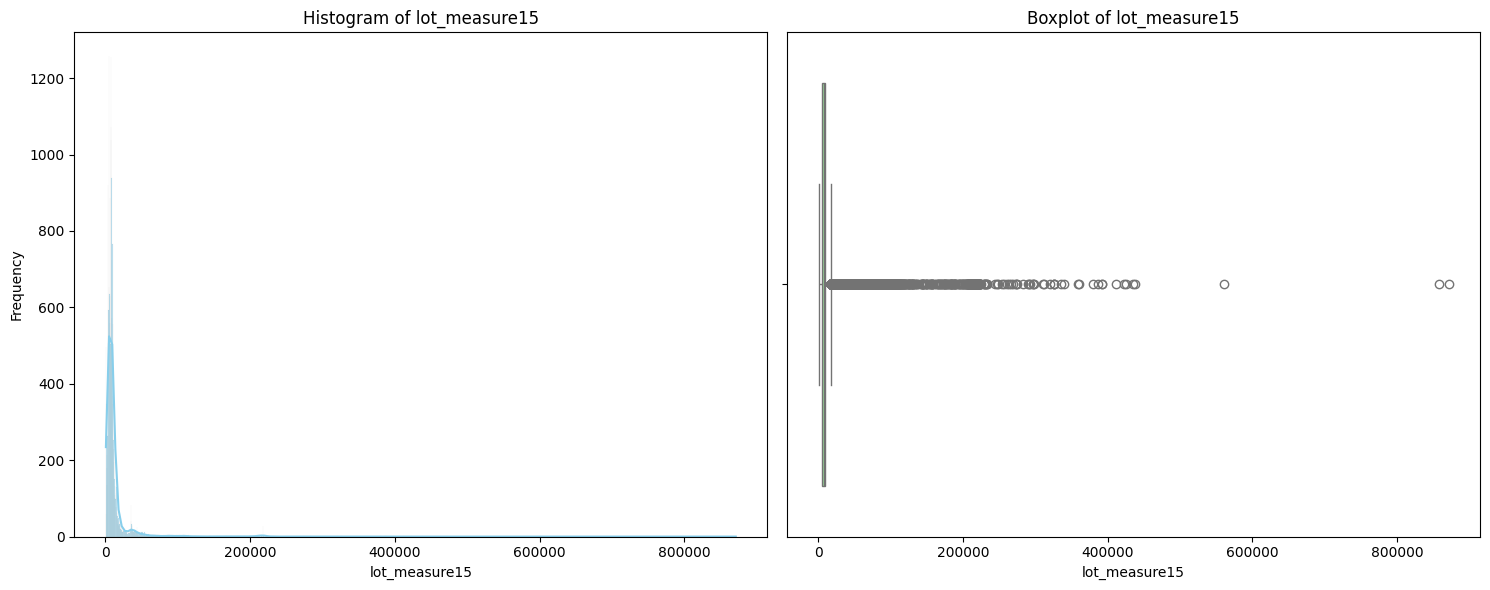

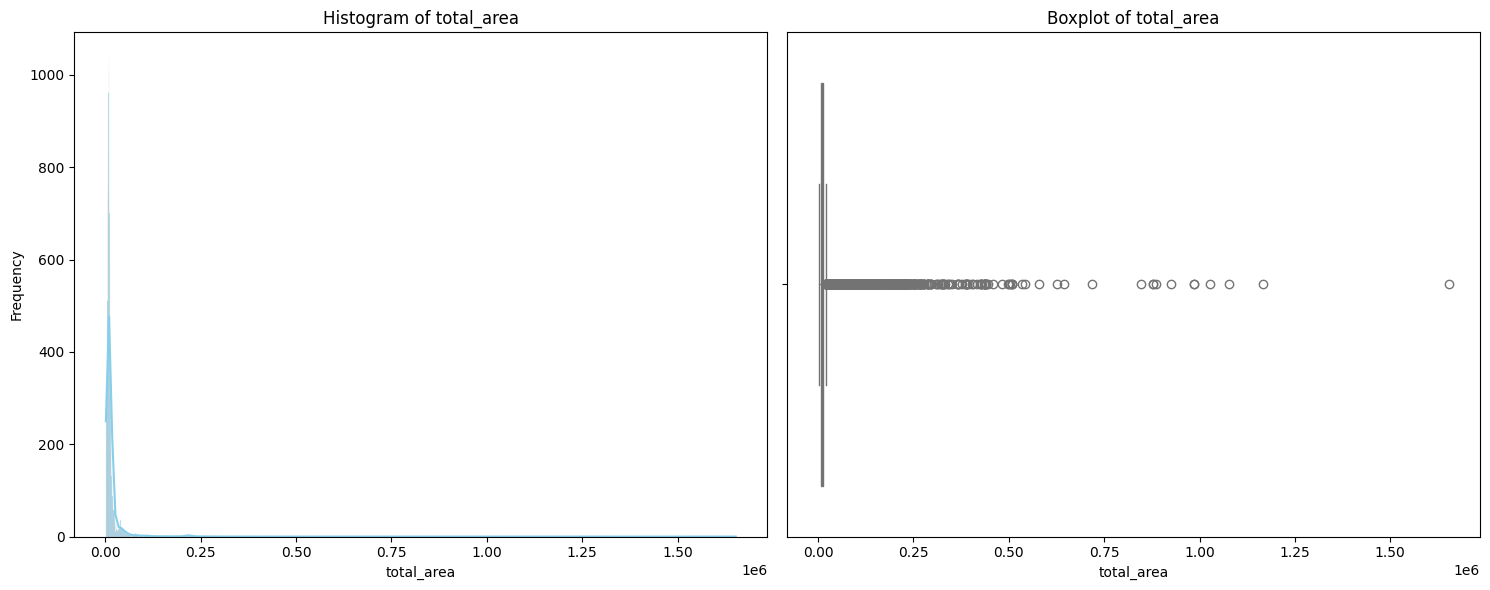

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each numerical column in 'num'
for column in num:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # Histogram
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[column], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [160]:
df.head().T

0                    1  \
cid                        3876100940           3145600250   
dayhours          2015-04-27 00:00:00  2015-03-17 00:00:00   
price                          600000               190000   
room_bed                          4.0                  2.0   
room_bath                        1.75                  1.0   
living_measure                 3050.0                670.0   
lot_measure                    9440.0               3101.0   
ceil                              1.0                  1.0   
coast                             0.0                  0.0   
sight                             0.0                  0.0   
condition                         3.0                  4.0   
quality                           8.0                  6.0   
ceil_measure                   1800.0                670.0   
basement                       1250.0                  0.0   
yr_built                       1966.0               1948.0   
yr_renovated                        0                    0   
zipcode                         98034                98118   
lat                           47.7228              47.5546   
long                         -122.183             -122.274   
living_measure15               2020.0               1660.0   
lot_measure15                  8660.0               4100.0   
furnished                         0.0                  0.0   
total_area                    12490.0               3771.0   

                                    2                    3  \
cid                        7129303070           7338220280   
dayhours          2014-08-20 00:00:00  2014-10-10 00:00:00   
price                          735000               257000   
room_bed                          4.0                  3.0   
room_bath                        2.75                  2.5   
living_measure                 3040.0               1740.0   
lot_measure                    2415.0               3721.0   
ceil                              2.0                  2.0   
coast                             1.0                  0.0   
sight                             4.0                  0.0   
condition                         3.0                  3.0   
quality                           8.0                  8.0   
ceil_measure                   3040.0               1740.0   
basement                          0.0                  0.0   
yr_built                       1966.0               2009.0   
yr_renovated                        0                    0   
zipcode                         98118                98002   
lat                           47.5188              47.3363   
long                         -122.256             -122.213   
living_measure15               2620.0               2030.0   
lot_measure15                  2433.0               3794.0   
furnished                         0.0                  0.0   
total_area                     5455.0               5461.0   

                                    4  
cid                        7950300670  
dayhours          2015-02-18 00:00:00  
price                          450000  
room_bed                          2.0  
room_bath                         1.0  
living_measure                 1120.0  
lot_measure                    4590.0  
ceil                              1.0  
coast                             0.0  
sight                             0.0  
condition                         3.0  
quality                           7.0  
ceil_measure                   1120.0  
basement                          0.0  
yr_built                       1924.0  
yr_renovated                        0  
zipcode                         98118  
lat                           47.5663  
long                         -122.285  
living_measure15               1120.0  
lot_measure15                  5100.0  
furnished                         0.0  
total_area                     5710.0

In [161]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
LL[LL < 0] = 0

In [162]:
LL

price                 0.0
living_measure        0.0
lot_measure           0.0
ceil_measure          0.0
basement              0.0
living_measure15    185.0
lot_measure15         0.0
total_area            0.0
dtype: float64

In [163]:
UL

price               1129575.0
living_measure         4230.0
lot_measure           19085.5
ceil_measure           3740.0
basement               1400.0
living_measure15       3665.0
lot_measure15         17550.0
total_area            21865.0
dtype: float64

In [164]:
# Count outliers for each variable
outliers_count = (df[num] < LL) | (df[num] > UL)
outliers_count = outliers_count.sum()
print("Number of outliers for each variable:")
print(outliers_count)

Number of outliers for each variable:
price               1159
living_measure       572
lot_measure         2426
ceil_measure         611
basement             496
living_measure15     540
lot_measure15       2192
total_area          2418
dtype: int64


In [165]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [166]:
for feature in df[num]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

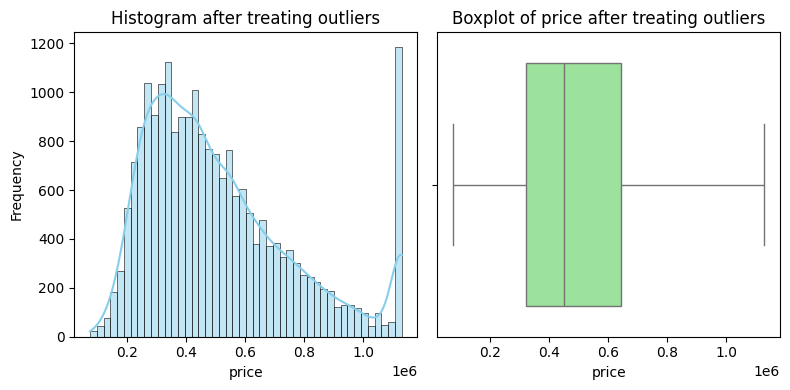

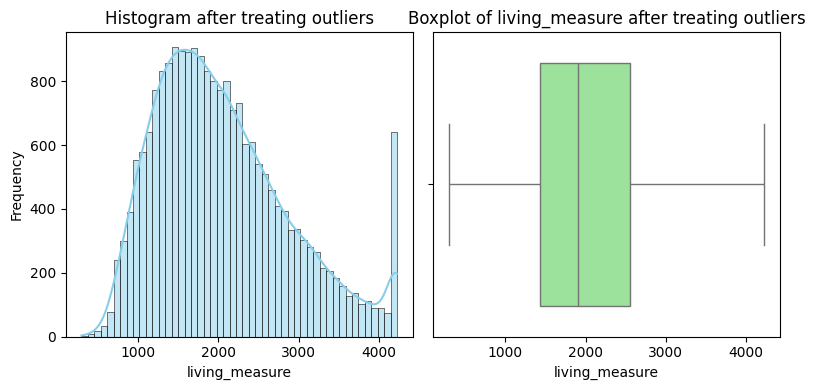

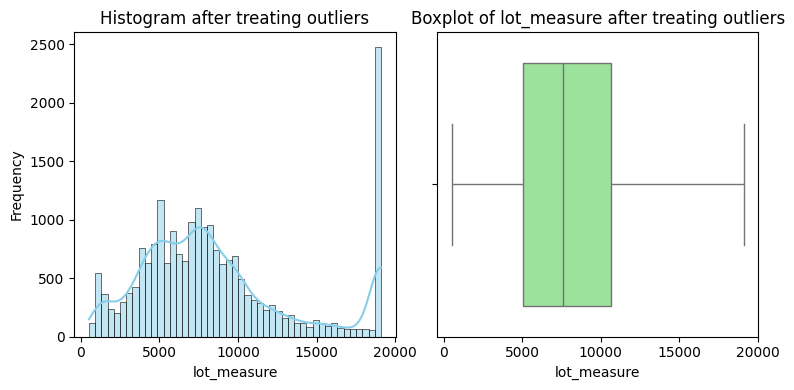

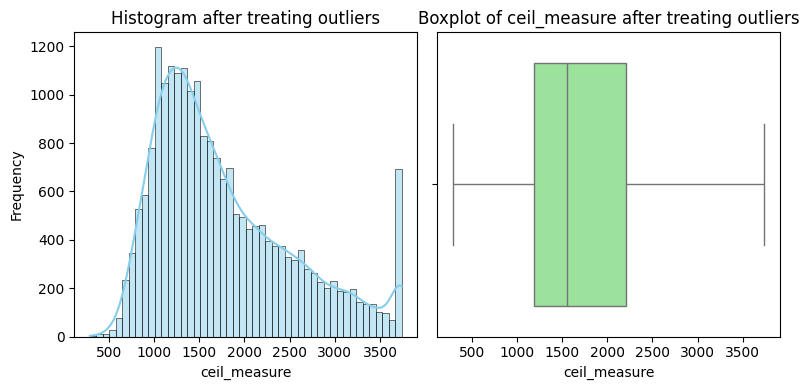

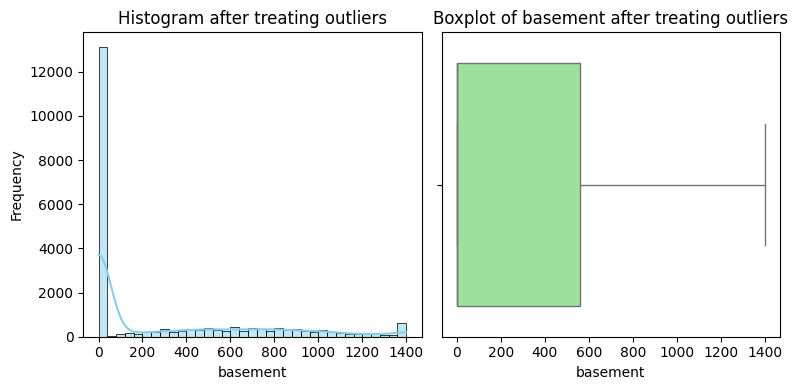

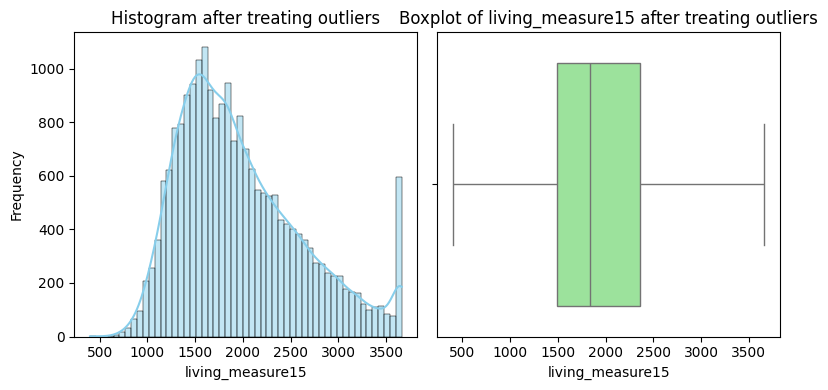

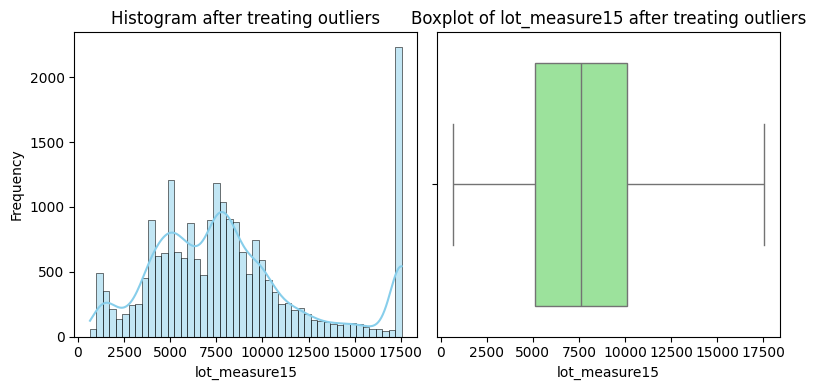

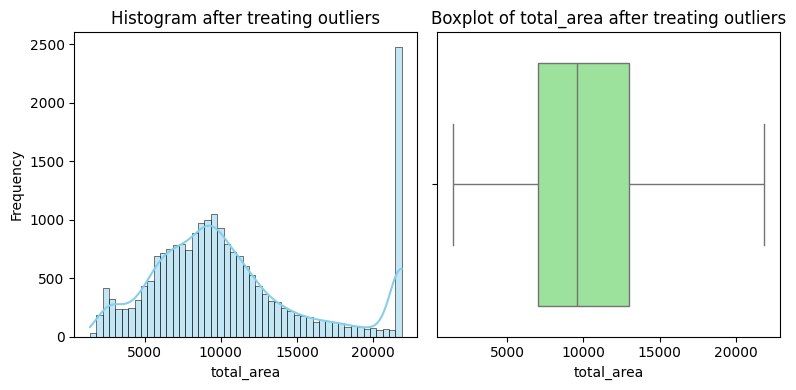

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have treated outliers and stored the treated numerical data in a variable 'df_treated'

# Iterate over each numerical column in 'num'
for column in num:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Histogram after treating outliers
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram after treating outliers')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot after treating outliers
    sns.boxplot(x=df[column], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column} after treating outliers')
    axes[1].set_xlabel(column)

    # Adjust layout
    plt.tight_layout()
    plt.show()


num = ['price','living_measure','lot_measure',
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area']
cat = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality','furnished']

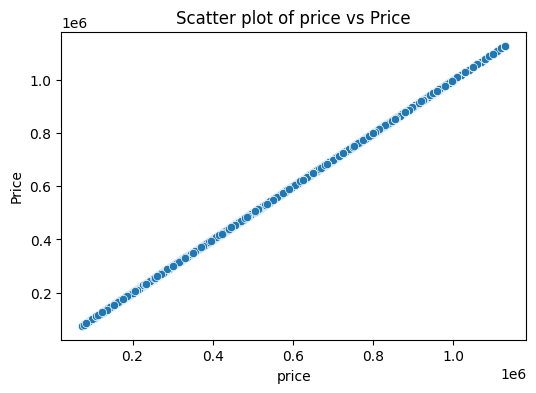

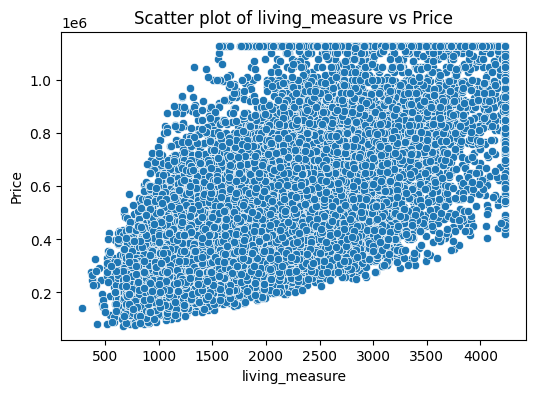

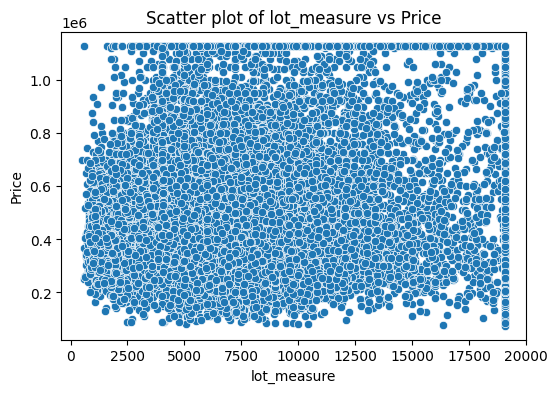

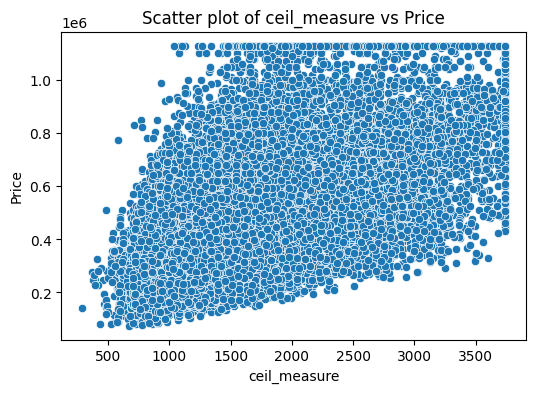

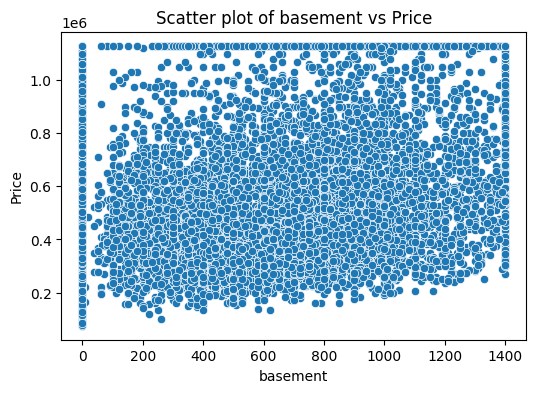

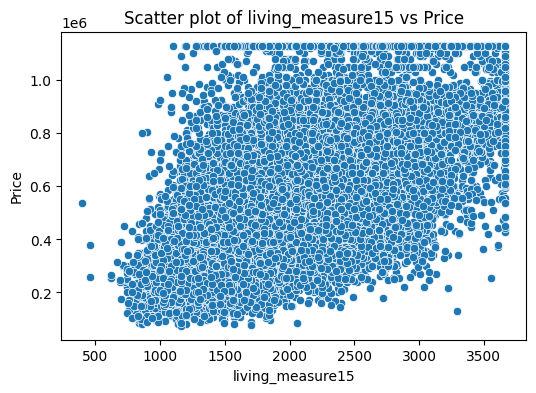

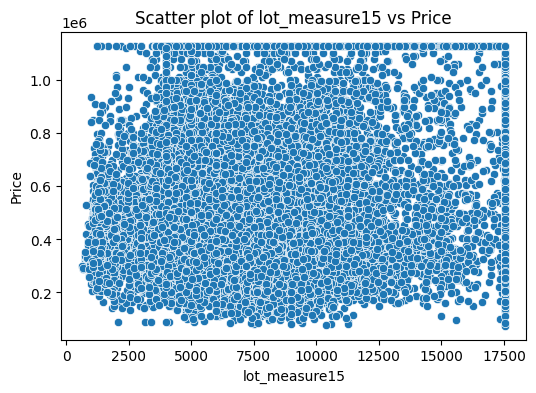

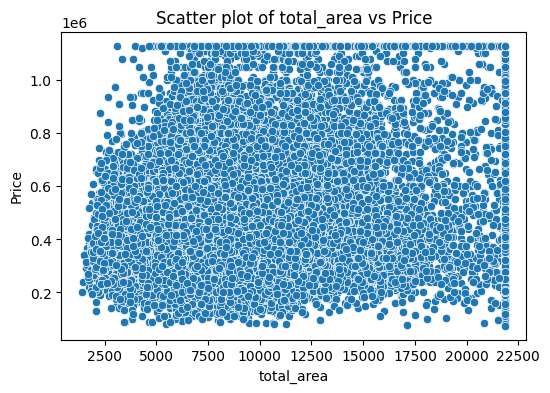

In [168]:

import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each numerical column in 'num'
for column in num:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column], y=df['price'])
    plt.title(f'Scatter plot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


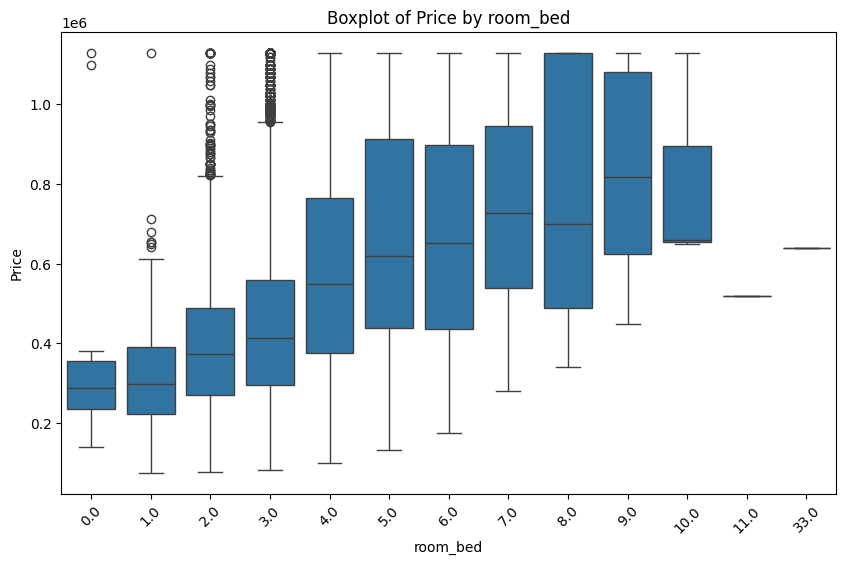

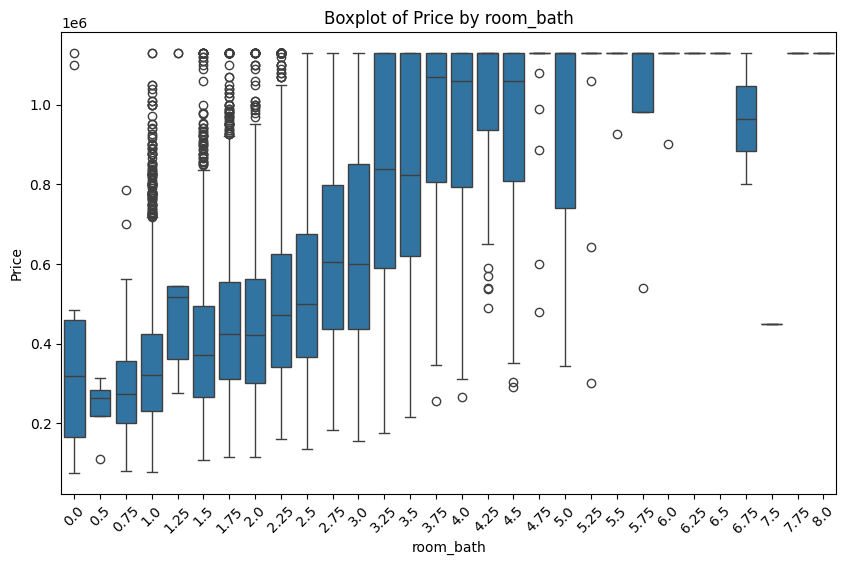

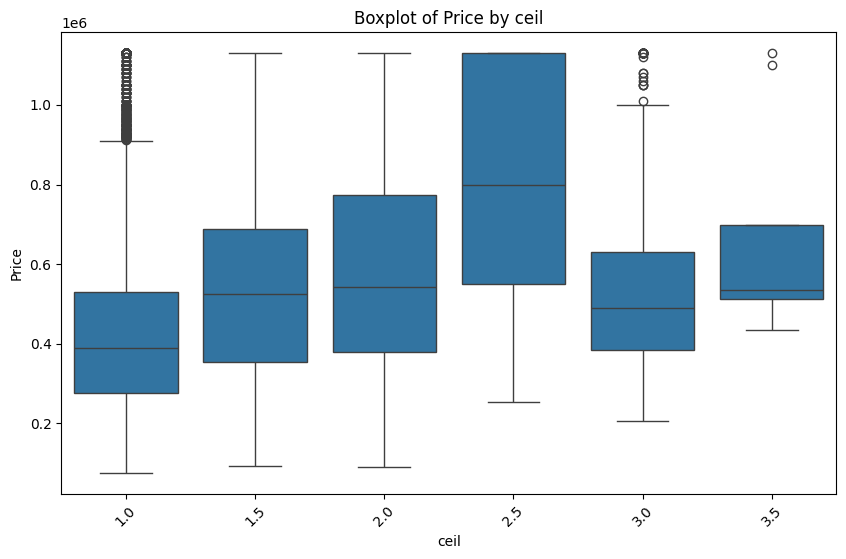

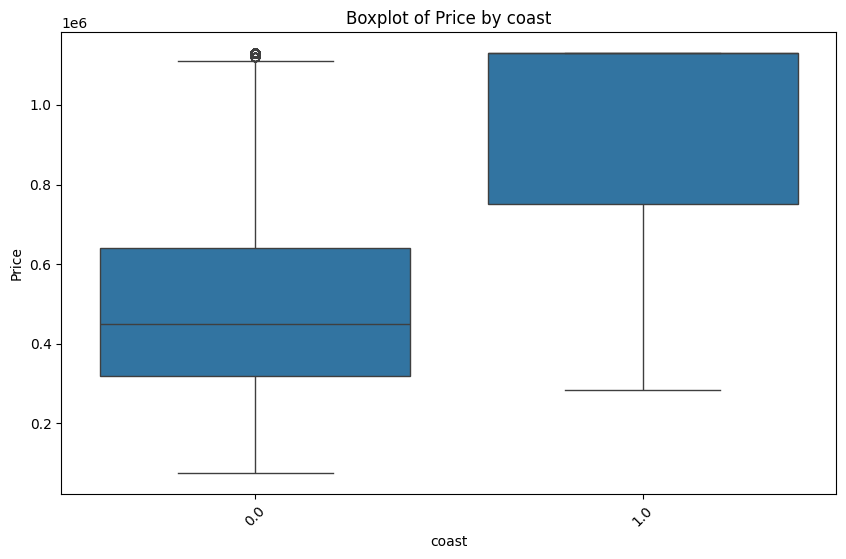

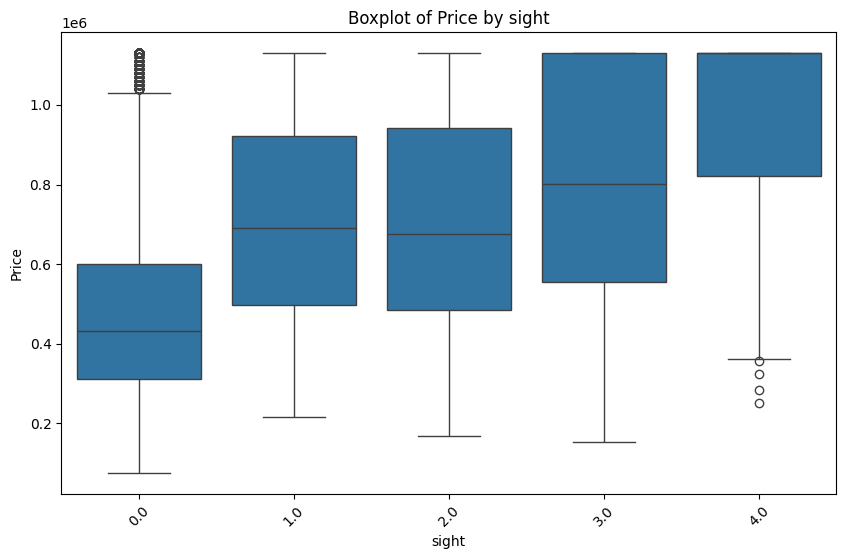

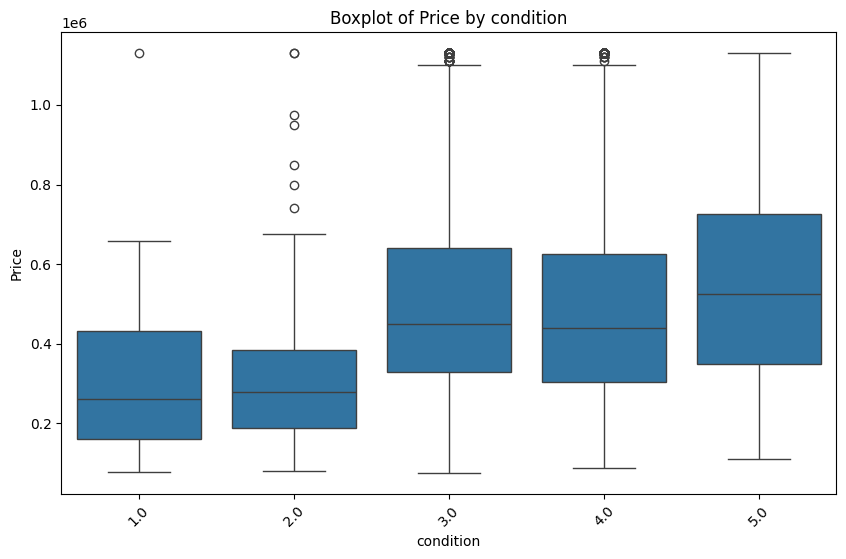

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each categorical column in 'cat'
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], y=df['price'])
    plt.title(f'Boxplot of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()


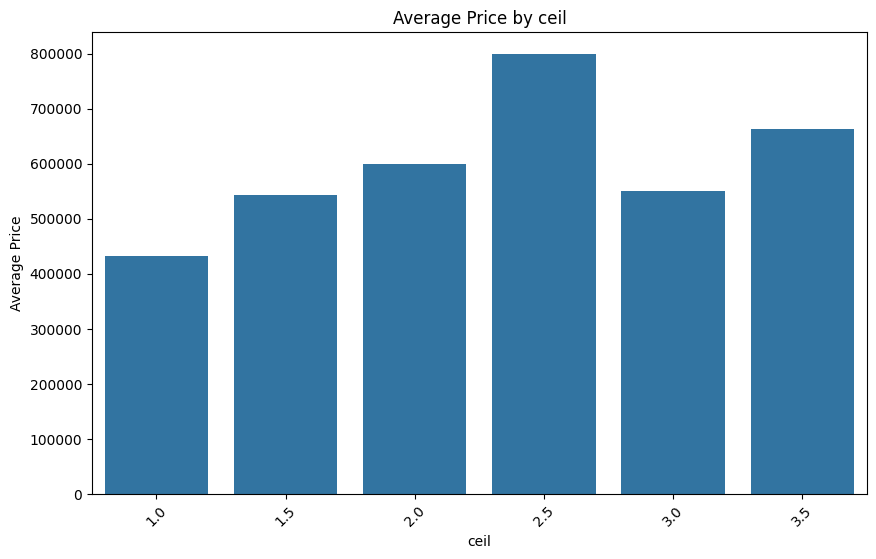

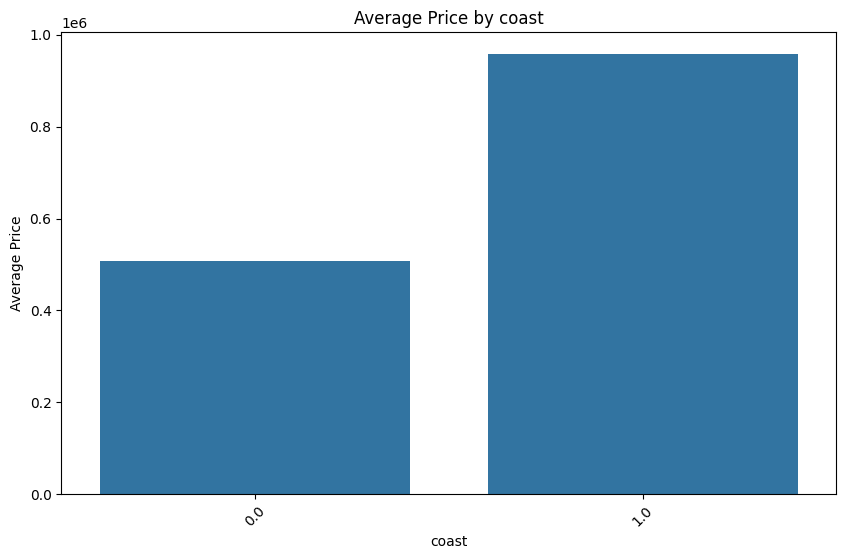

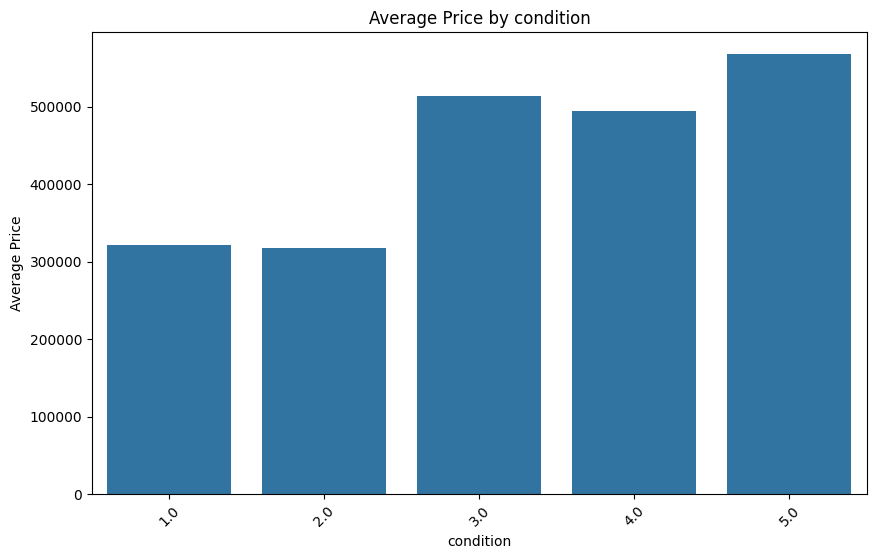

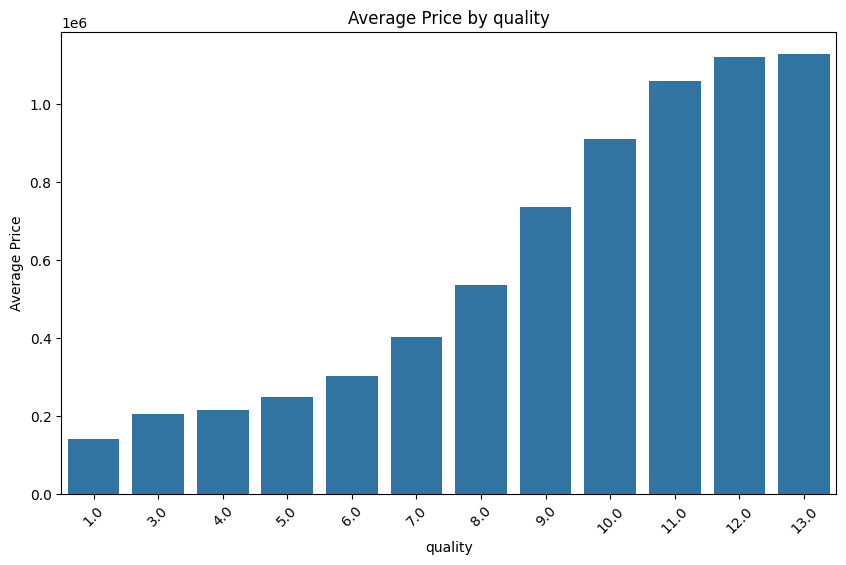

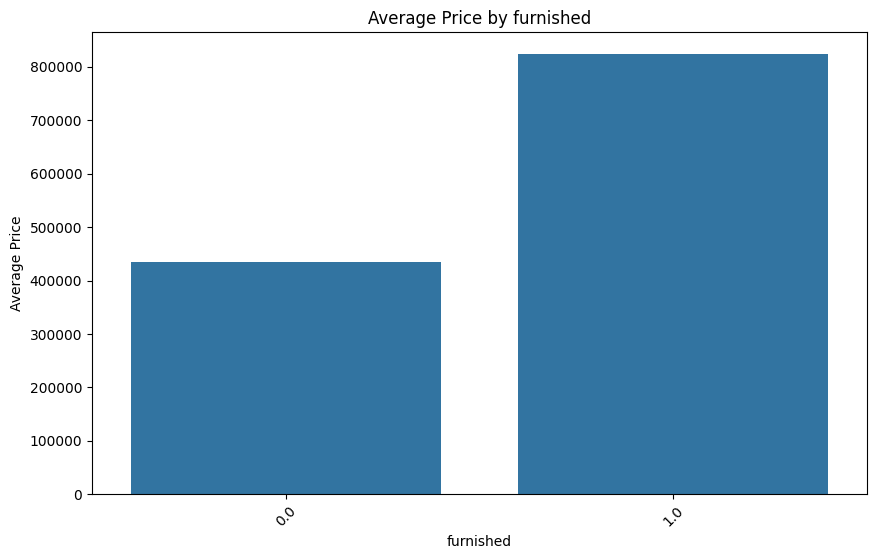

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each categorical column in 'cat'
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[column], y=df['price'], errorbar=None)  # Use errorbar=None to disable confidence intervals
    plt.title(f'Average Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()



C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


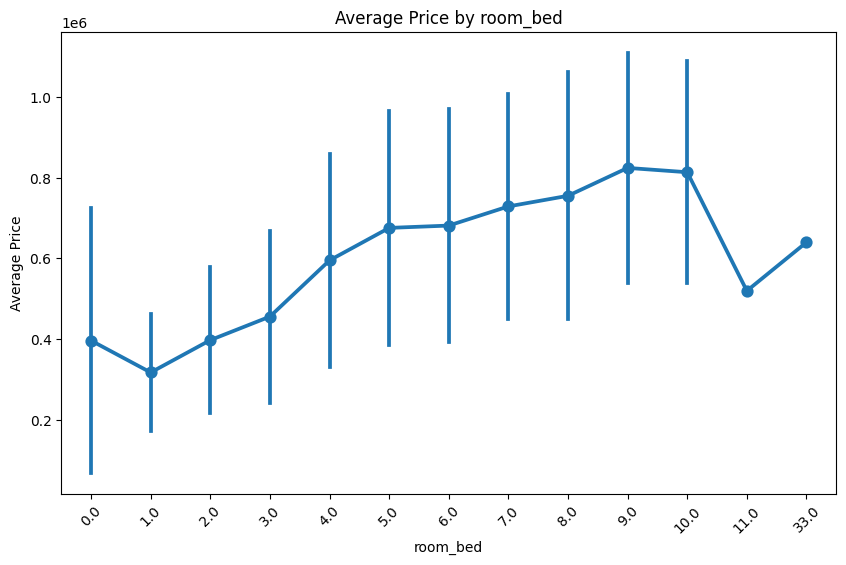

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


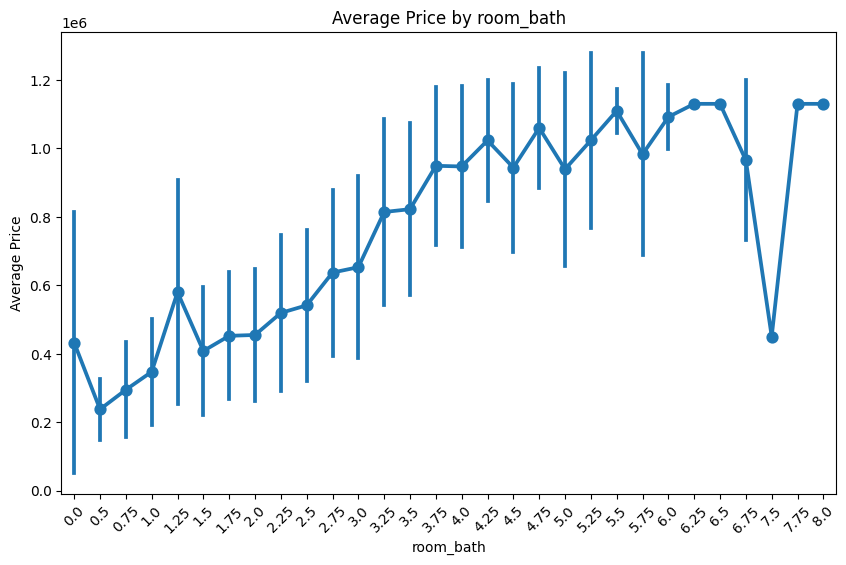

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


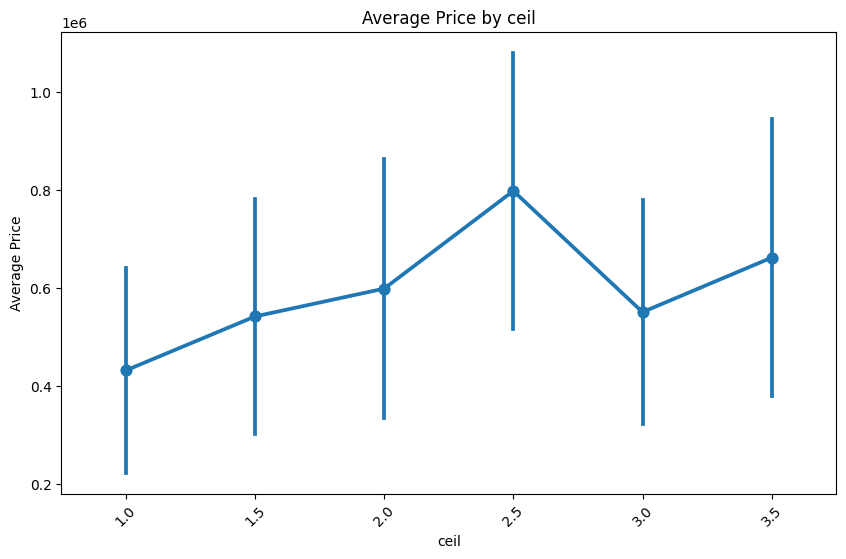

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


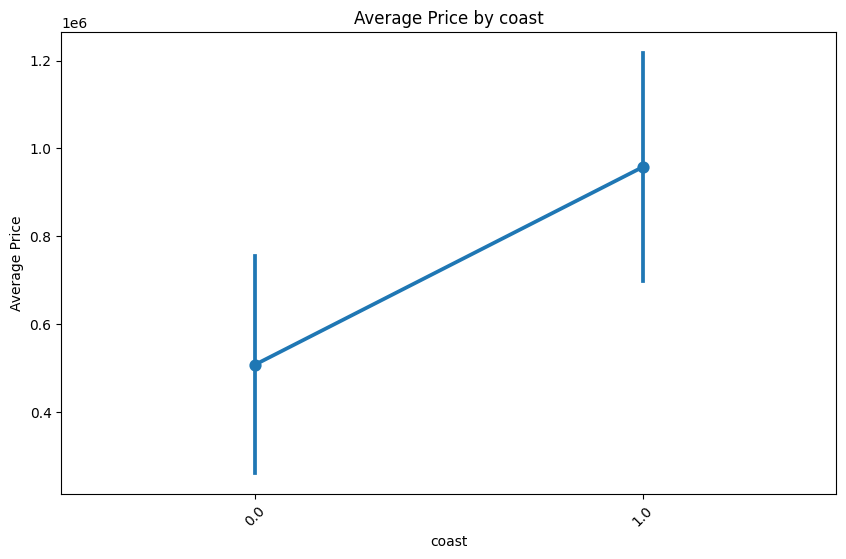

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


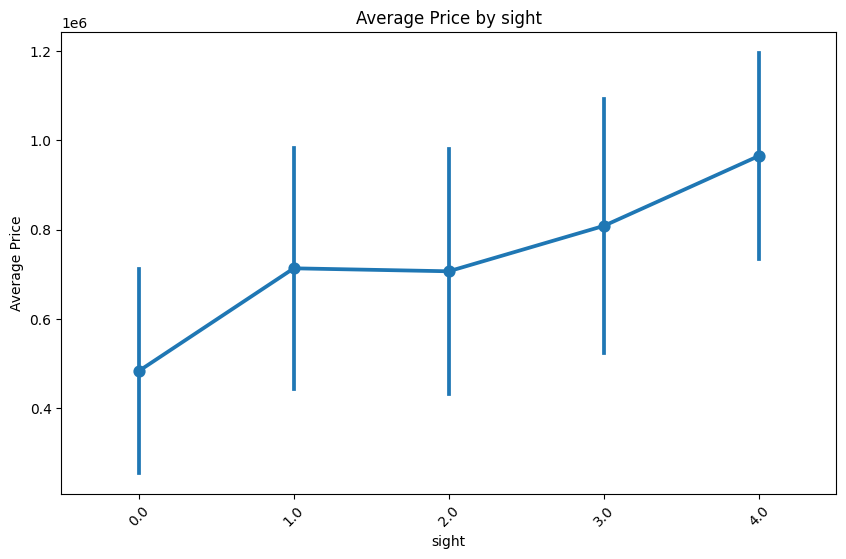

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


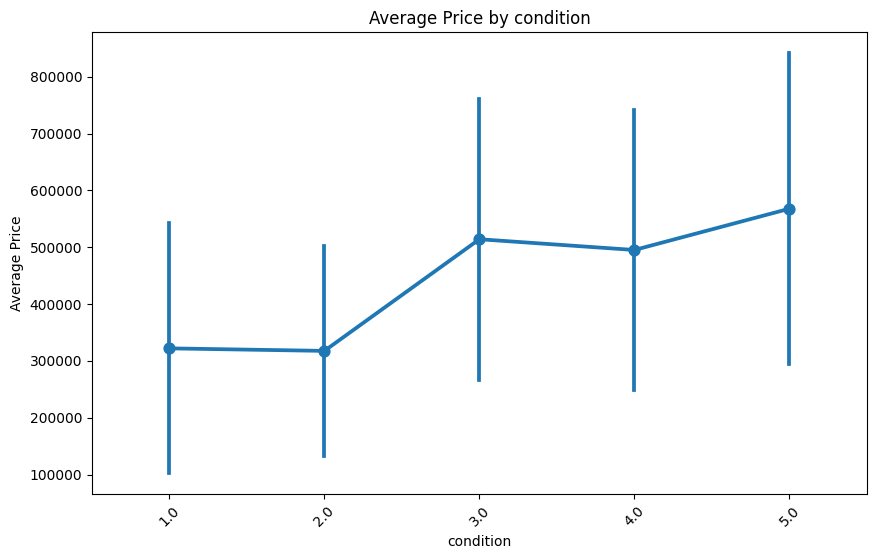

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


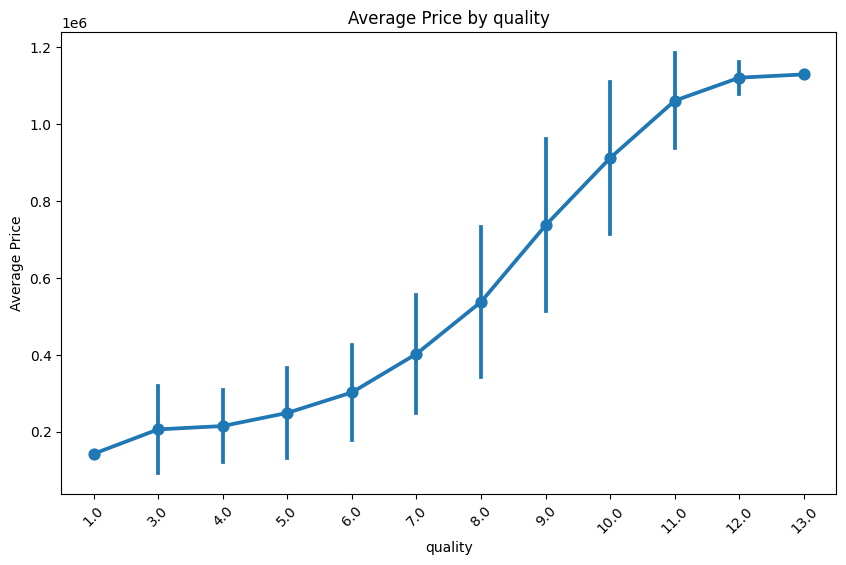

C:\Users\91994\AppData\Local\Temp\ipykernel_10676\4224895855.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals


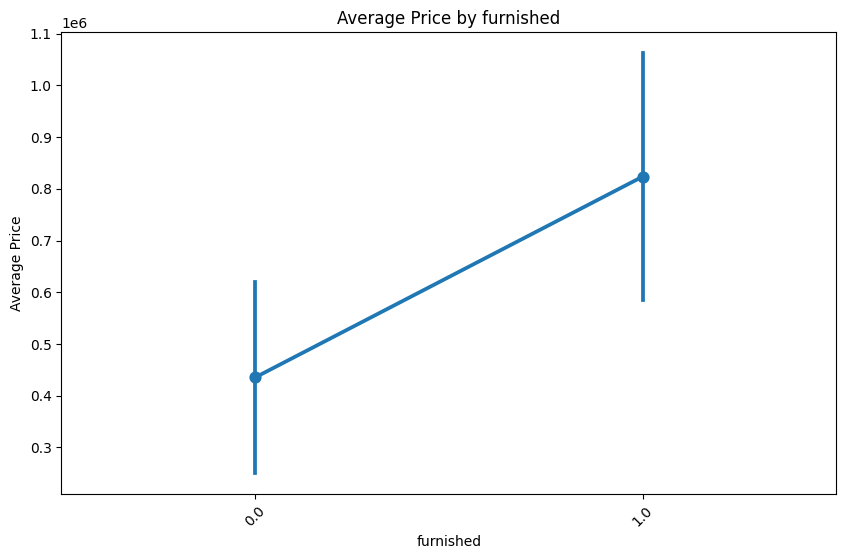

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each categorical column in 'cat'
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.pointplot(x=df[column], y=df['price'], ci='sd')  # ci='sd' for standard deviation confidence intervals
    plt.title(f'Average Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()


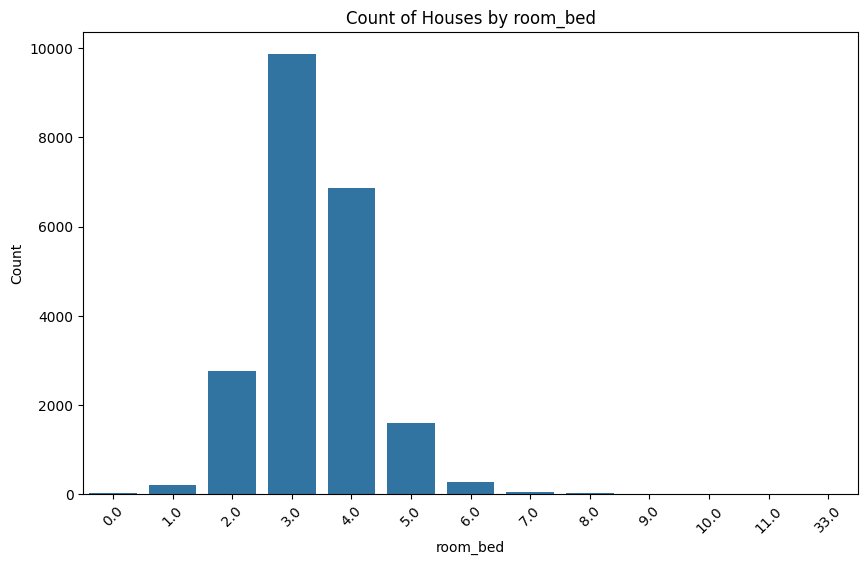

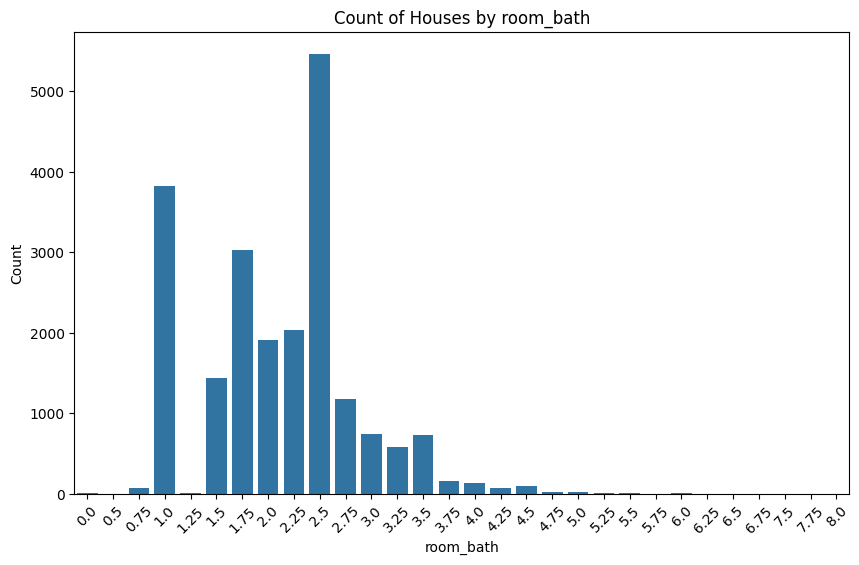

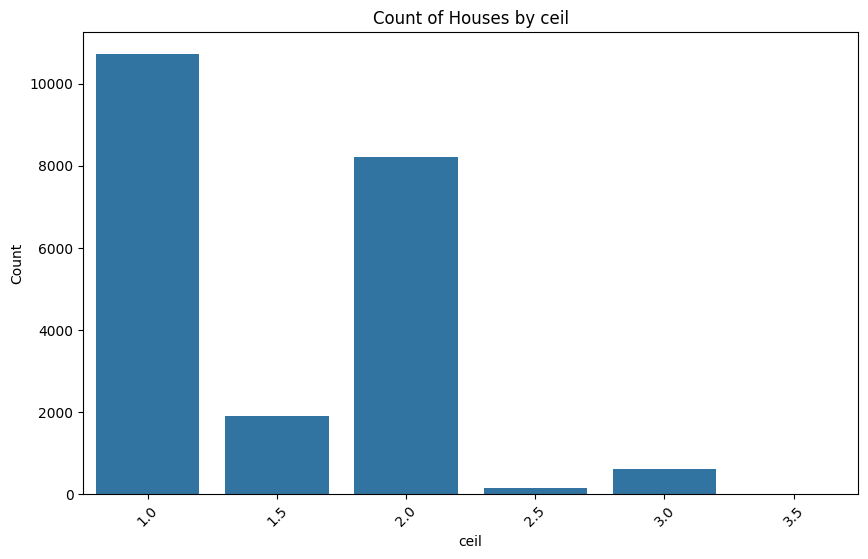

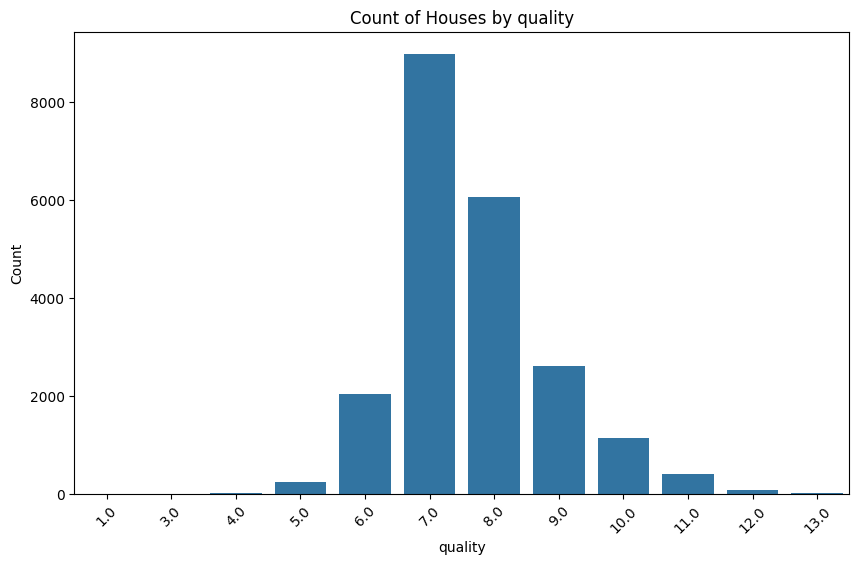

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each categorical column in 'cat'
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Count of Houses by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()


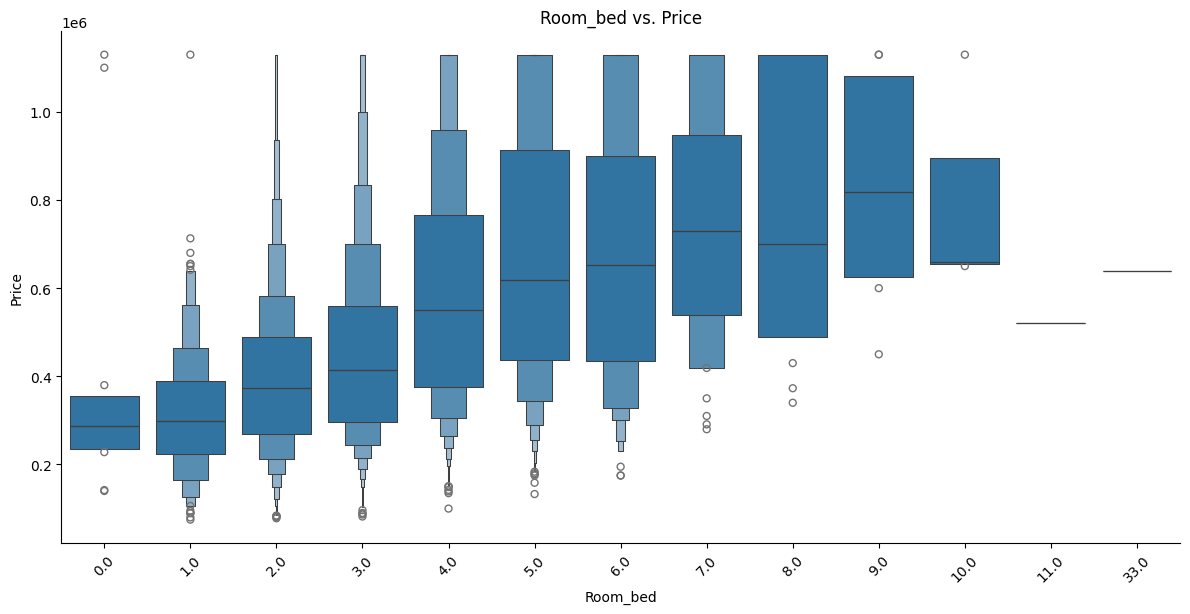

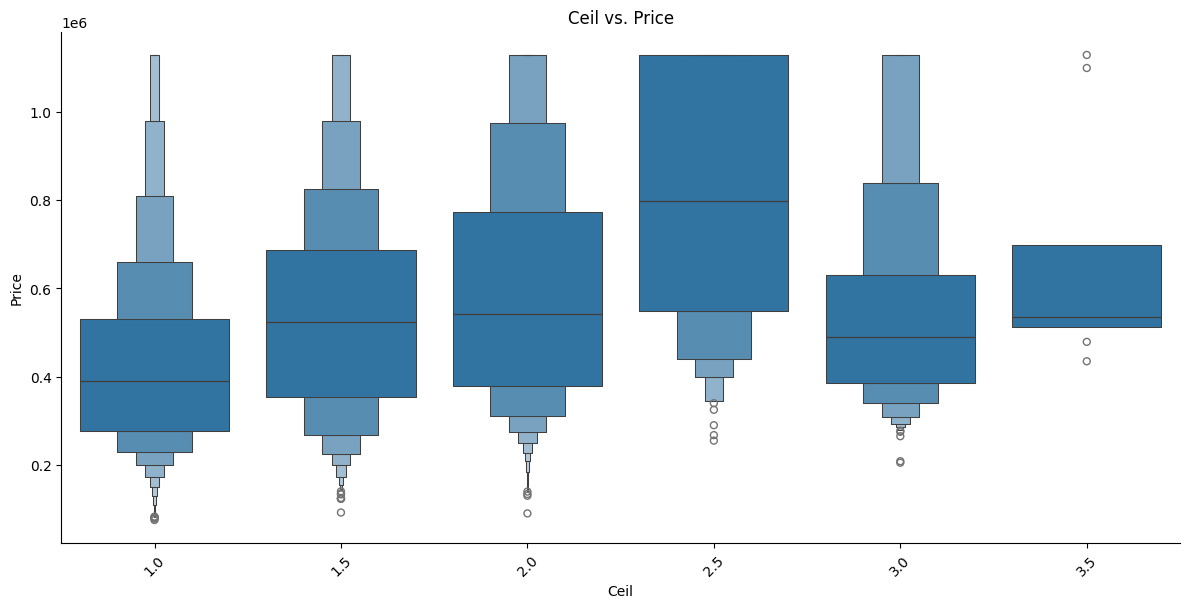

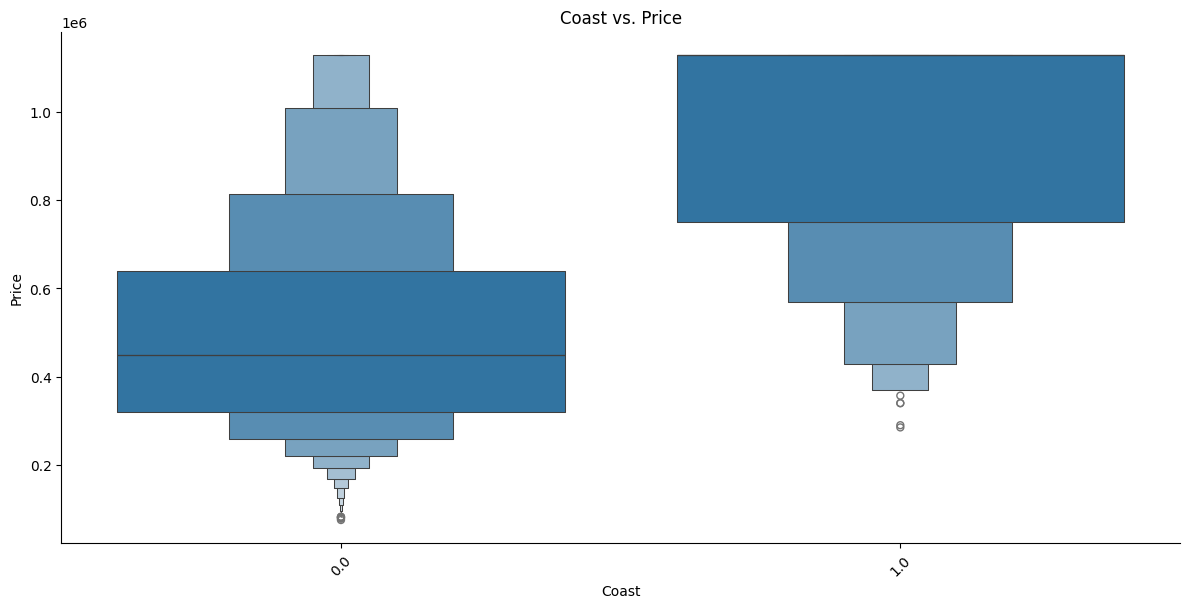

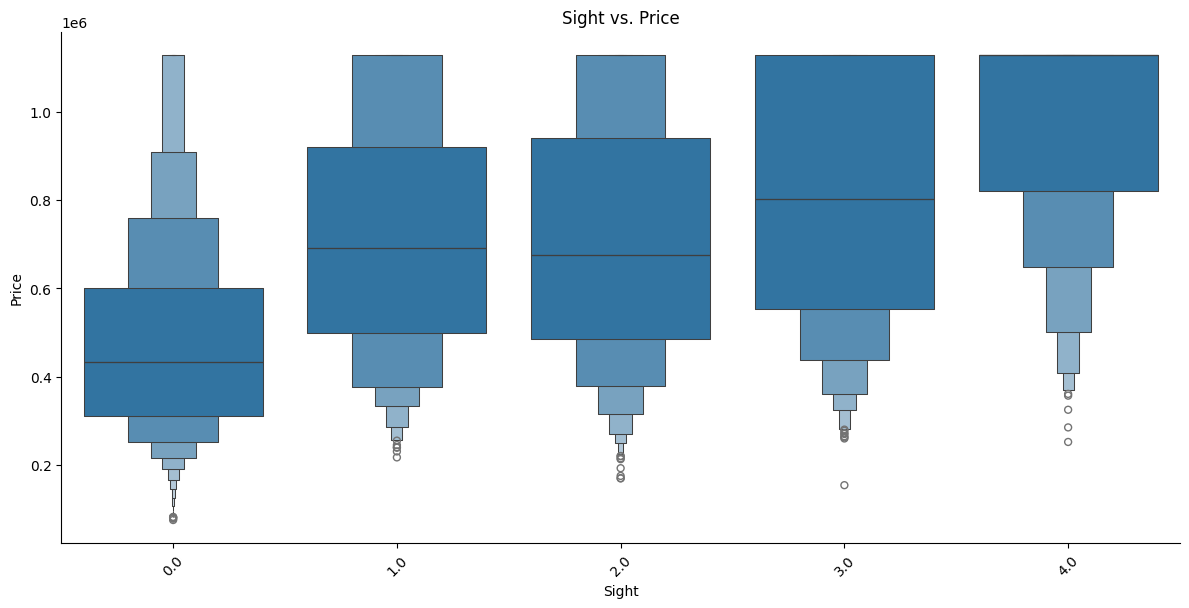

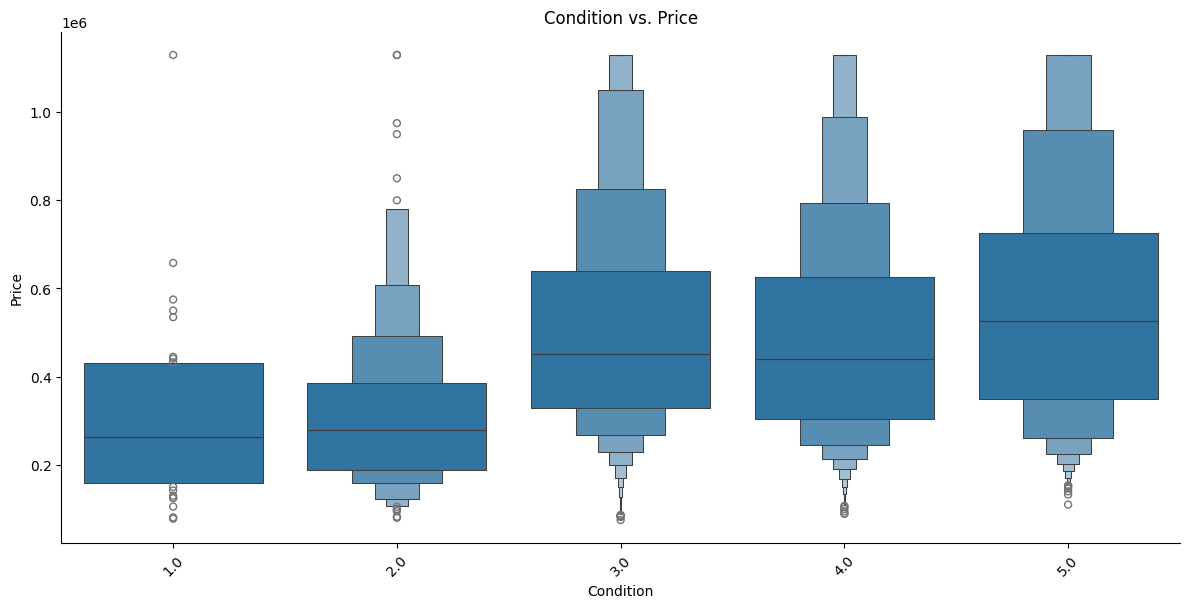

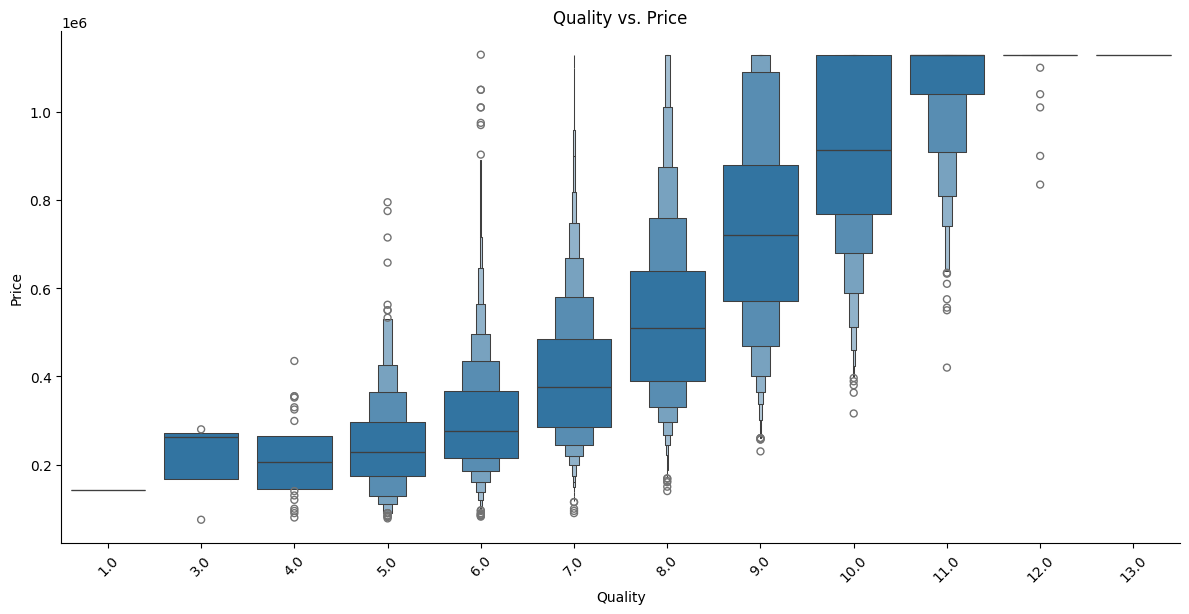

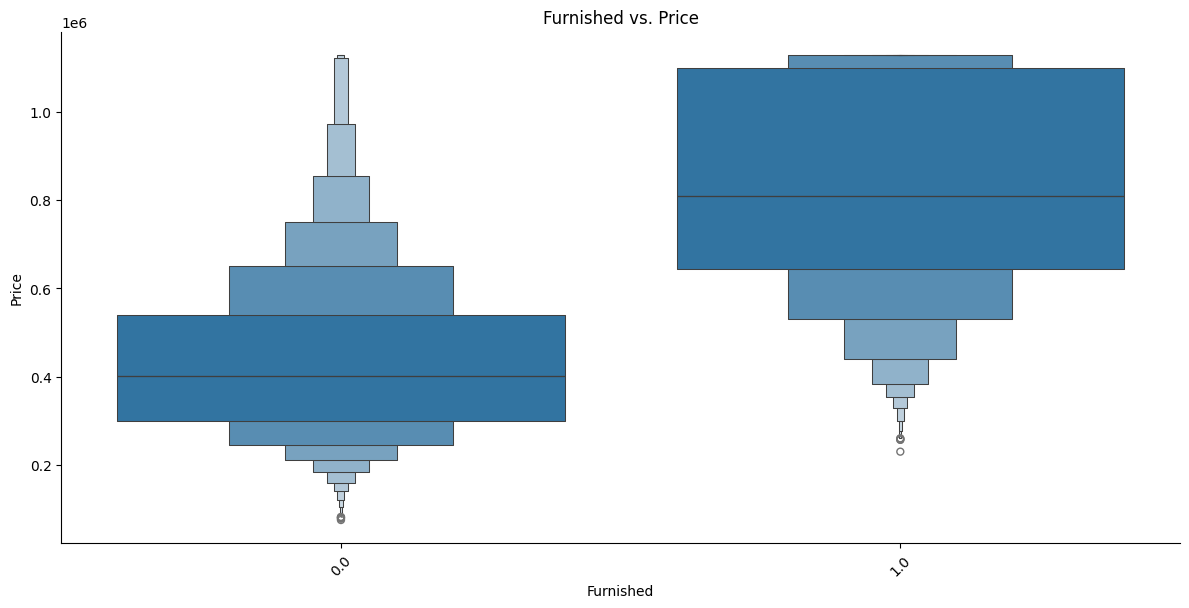

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each categorical column in 'cat'
for column in cat:
    # Create a categorical plot
    sns.catplot(x=column, y='price', data=df, kind='boxen', height=6, aspect=2)
    plt.title(f'{column.capitalize()} vs. Price')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()


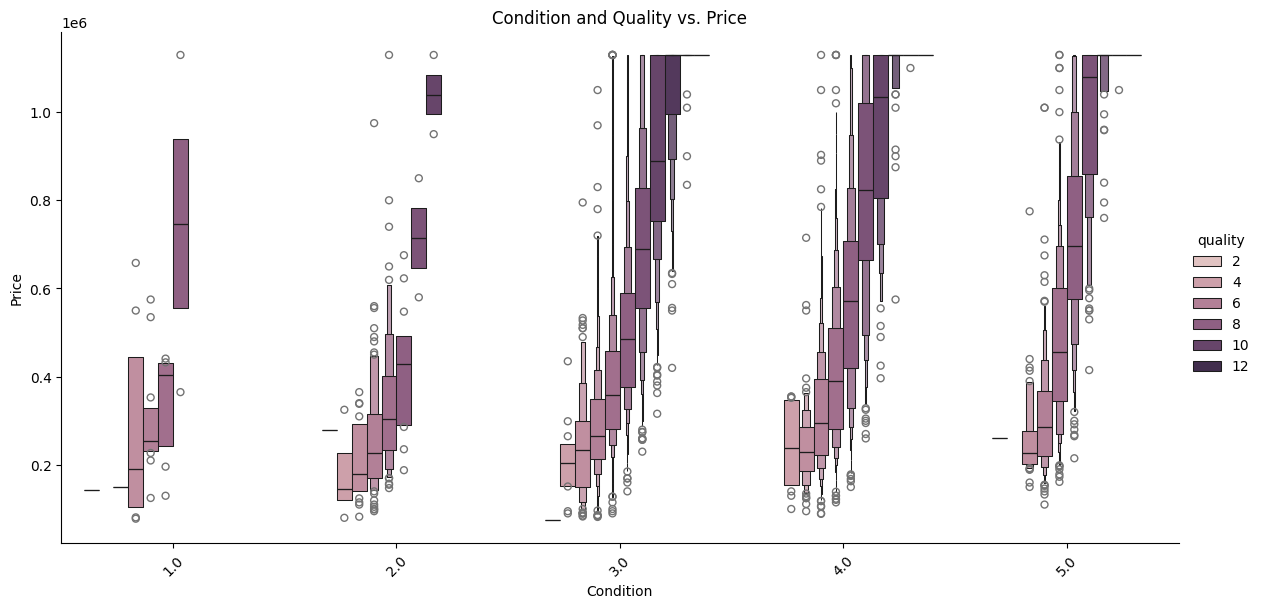

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the two categorical variables you want to plot
cat1 = 'condition'
cat2 = 'quality'

# Create a categorical plot with hue
sns.catplot(x=cat1, y='price', hue=cat2, data=df, kind='boxen', height=6, aspect=2)
plt.title(f'{cat1.capitalize()} and {cat2.capitalize()} vs. Price')
plt.xlabel(f'{cat1.capitalize()}')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


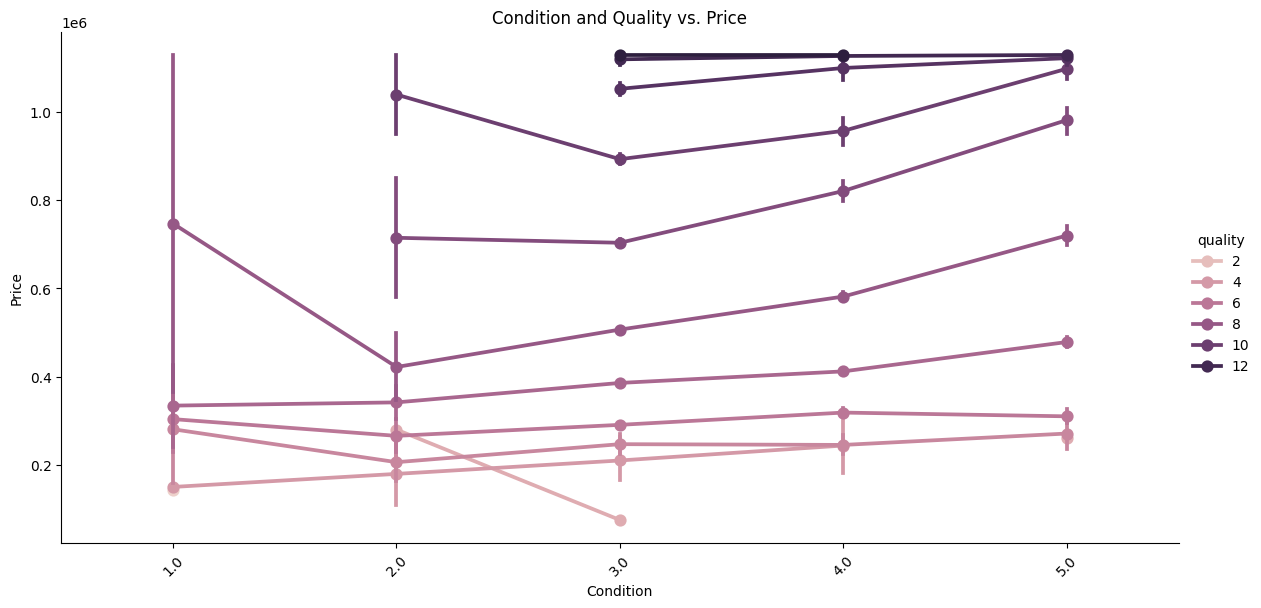

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the two categorical variables you want to plot
cat1 = 'condition'
cat2 = 'quality'

# Create a point plot with hue
sns.catplot(x=cat1, y='price', hue=cat2, data=df, kind='point', height=6, aspect=2)
plt.title(f'{cat1.capitalize()} and {cat2.capitalize()} vs. Price')
plt.xlabel(f'{cat1.capitalize()}')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical variables for the heatmap
num_vars = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 
            'living_measure15', 'lot_measure15', 'total_area']

# Calculate the correlation matrix
corr_matrix = df[num_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [177]:
df.head().T

0                    1  \
cid                        3876100940           3145600250   
dayhours          2015-04-27 00:00:00  2015-03-17 00:00:00   
price                        600000.0             190000.0   
room_bed                          4.0                  2.0   
room_bath                        1.75                  1.0   
living_measure                 3050.0                670.0   
lot_measure                    9440.0               3101.0   
ceil                              1.0                  1.0   
coast                             0.0                  0.0   
sight                             0.0                  0.0   
condition                         3.0                  4.0   
quality                           8.0                  6.0   
ceil_measure                   1800.0                670.0   
basement                       1250.0                  0.0   
yr_built                       1966.0               1948.0   
yr_renovated                        0                    0   
zipcode                         98034                98118   
lat                           47.7228              47.5546   
long                         -122.183             -122.274   
living_measure15               2020.0               1660.0   
lot_measure15                  8660.0               4100.0   
furnished                         0.0                  0.0   
total_area                    12490.0               3771.0   

                                    2                    3  \
cid                        7129303070           7338220280   
dayhours          2014-08-20 00:00:00  2014-10-10 00:00:00   
price                        735000.0             257000.0   
room_bed                          4.0                  3.0   
room_bath                        2.75                  2.5   
living_measure                 3040.0               1740.0   
lot_measure                    2415.0               3721.0   
ceil                              2.0                  2.0   
coast                             1.0                  0.0   
sight                             4.0                  0.0   
condition                         3.0                  3.0   
quality                           8.0                  8.0   
ceil_measure                   3040.0               1740.0   
basement                          0.0                  0.0   
yr_built                       1966.0               2009.0   
yr_renovated                        0                    0   
zipcode                         98118                98002   
lat                           47.5188              47.3363   
long                         -122.256             -122.213   
living_measure15               2620.0               2030.0   
lot_measure15                  2433.0               3794.0   
furnished                         0.0                  0.0   
total_area                     5455.0               5461.0   

                                    4  
cid                        7950300670  
dayhours          2015-02-18 00:00:00  
price                        450000.0  
room_bed                          2.0  
room_bath                         1.0  
living_measure                 1120.0  
lot_measure                    4590.0  
ceil                              1.0  
coast                             0.0  
sight                             0.0  
condition                         3.0  
quality                           7.0  
ceil_measure                   1120.0  
basement                          0.0  
yr_built                       1924.0  
yr_renovated                        0  
zipcode                         98118  
lat                           47.5663  
long                         -122.285  
living_measure15               1120.0  
lot_measure15                  5100.0  
furnished                         0.0  
total_area                     5710.0

In [178]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume df contains your preprocessed data with only numerical variables
# You can choose which numerical variables to include in X
X = df[['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'total_area']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (k)
k = 3  # You can choose the appropriate number of clusters using methods like the elbow method or silhouette score

# Apply K-Means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Visualize the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

# Analyze cluster sizes
cluster_sizes = df['cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)

# Optionally, you can perform further analysis and visualization of the clusters



Cluster Centers:
      price  living_measure  lot_measure  ceil_measure  basement  total_area
0 -0.141424        0.112531     1.665874      0.068575  0.103679    1.618388
1  1.360395        1.447970     0.308950      1.372668  0.364980    0.488140
2 -0.401508       -0.487024    -0.476340     -0.453054 -0.139845   -0.522681

Cluster Sizes:
cluster
2    13978
1     4464
0     3171
Name: count, dtype: int64


In [179]:
# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Now df contains the 'cluster' column with cluster labels
df.head()


cid   dayhours     price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000.0       4.0       1.75          3050.0   
1  3145600250 2015-03-17  190000.0       2.0       1.00           670.0   
2  7129303070 2014-08-20  735000.0       4.0       2.75          3040.0   
3  7338220280 2014-10-10  257000.0       3.0       2.50          1740.0   
4  7950300670 2015-02-18  450000.0       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
0       9440.0   1.0    0.0    0.0  ...    1966.0             0    98034   
1       3101.0   1.0    0.0    0.0  ...    1948.0             0    98118   
2       2415.0   2.0    1.0    4.0  ...    1966.0             0    98118   
3       3721.0   2.0    0.0    0.0  ...    2009.0             0    98002   
4       4590.0   1.0    0.0    0.0  ...    1924.0             0    98118   

       lat     long  living_measure15  lot_measure15  furnished  total_area  \
0  47.7228 -122.183            2020.0         8660.0        0.0     12490.0   
1  47.5546 -122.274            1660.0         4100.0        0.0      3771.0   
2  47.5188 -122.256            2620.0         2433.0        0.0      5455.0   
3  47.3363 -122.213            2030.0         3794.0        0.0      5461.0   
4  47.5663 -122.285            1120.0         5100.0        0.0      5710.0   

   cluster  
0        1  
1        2  
2        1  
3        2  
4        2  

[5 rows x 24 columns]